# Proyecto 1 - Juan Luis Baldelomar Cabrera

In [1]:
import pandas
import numpy as np

from nltk import TweetTokenizer
from nltk.corpus import stopwords

from nltk.probability import FreqDist

# Load Data

In [2]:
import pandas
xls = pandas.ExcelFile('Opiniones Tripadvisor_nlp2022.xlsx')
ds1, ds1_name = pandas.read_excel(xls, 'BasilicaColegiata'), 'Basilica Colegiata'
ds2, ds2_name = pandas.read_excel(xls, 'MercadoHidalgo'),    'Mercado Hidalgo'
ds3, ds3_name = pandas.read_excel(xls, 'CasaDiegoRivera'),   'Casa de Diego Rivera'
ds4, ds4_name = pandas.read_excel(xls, 'UG'),                'Universidad de Guanajuato'
ds5, ds5_name = pandas.read_excel(xls, 'Alhondiga'),         'Alhondiga'
ds6, ds6_name = pandas.read_excel(xls, 'TeatroJuarez'),      'Teatro Juarez'
ds7, ds7_name = pandas.read_excel(xls, 'JardinUnion'),       'Jardin Union'
ds8, ds8_name = pandas.read_excel(xls, 'CallejonBeso'),      'Callejon del Beso'
ds9, ds9_name = pandas.read_excel(xls, 'Pipila'),            'Monumento al Pipila'
ds10, ds10_name = pandas.read_excel(xls, 'MuseoMomias'),     'Museo de las Momias'

In [3]:
ds1

Género  Edad Nacional ó Internacional Calificación  Escala  \
0     Femenino  64.0            Internacional    Muy bueno       4   
1    Masculino  59.0            Internacional    Excelente       5   
2     Femenino  26.0            Internacional    Excelente       5   
3    Masculino  50.0            Internacional    Excelente       5   
4     Femenino  55.0            Internacional      Regular       3   
..         ...   ...                      ...          ...     ...   
555   Femenino  43.0                 Nacional    Muy bueno       4   
556  Masculino  38.0            Internacional    Excelente       5   
557   Femenino  23.0                 Nacional    Excelente       5   
558   Femenino  49.0                 Nacional    Excelente       5   
559  Masculino  65.0                 Nacional    Excelente       5   

     Número de aportaciones  \
0                       175   
1                       306   
2                       106   
3                        62   
4                        59   
..                      ...   
555                      12   
556                      11   
557                       2   
558                      60   
559                      22   

                                  Título de la opinión  \
0                                      "Punto central"   
1    "The most important church in this colonial to...   
2                "Y uno de los símbolos de Guanajuato"   
3                           "Beautiful and a must see"   
4                                               "Nice"   
..                                                 ...   
555                                  "Hermosa iglesia"   
556                                       "Historical"   
557         "Basílica de Nuestra Señora de Guanajuato"   
558                                 "Beautiful Church"   
559                          "Stop by & take a peek:)"   

                                               Opinión            País  \
0    "Basílica muy bien conservada, punto central e...        Colombia   
1    "The Basilica (Guanajuato does not have a Cath...        Colombia   
2    "Edificio de la iglesia amarilla es un abigarr...   Corea del Sur   
3    "A must see place in town and very nice to go ...  Estados Unidos   
4    "Not particularly impressive, but if you like ...  Estados Unidos   
..                                                 ...             ...   
555  "Es un sitio lleno de contrastes. Fuera del te...          México   
556  "I walked into the Basilica and felt suddenly ...          Canadá   
557  "Un lugar al buen estilo barroco, puedes admir...          México   
558  "The inside of this Church in Plaza la Paz, is...          México   
559  "There is a gold organ in the loft. The entire...          México   

      Idioma Dispositivo      Fecha  
0    Español       Móvil 2018-05-13  
1     Inglés          PC 2018-05-08  
2    Coreano          PC 2018-05-05  
3     Inglés          PC 2018-05-01  
4     Inglés          PC 2018-04-29  
..       ...         ...        ...  
555  Español          PC 2011-12-03  
556   Inglés          PC 2011-09-17  
557  Español          PC 2011-09-11  
558   Inglés          PC 2011-09-02  
559   Inglés          PC 2011-04-03  

[560 rows x 12 columns]

In [4]:
datasets = [ds1, ds2, ds3, ds4, ds5, ds6, ds7, ds8, ds9, ds10]
ds_names = [ds1_name, ds2_name, ds3_name, ds4_name, ds5_name, ds6_name, ds7_name, ds8_name, ds9_name, ds10_name]

# Utilities

## String Functions and Dummy Function

In [7]:
def bold_string(string):
    return '\033[1m' + string + '\033[0m '

def dummy(doc):
    return doc

## Process Documents and Get Vocabulary by Hand 

In [8]:
from nltk import TweetTokenizer
from nltk.corpus import stopwords

def process_documents(documents, tokenize=True):
    docs = []
    tokenizer = TweetTokenizer()
    for doc in documents:
        if tokenize:
            docs.append(tokenizer.tokenize(doc.lower().replace('\"','')))
        else:
            docs.append(doc.lower().replace('\"',''))
        
    return docs

def get_vocabulary(docs, size=-1):
    tokens = [word for doc in docs for word in doc]
    voc = FreqDist(tokens).most_common(size) if size!= -1 else FreqDist(tokens).most_common()
    voc_dict = {}
    for i, (word, _) in enumerate(voc):
        voc_dict[word] = i
        
    return voc_dict

## BoW and Feature Reduction Functions

In [10]:
from sklearn.feature_extraction.text import CountVectorizer as bow_builder
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.preprocessing import LabelBinarizer


def chi_sqr(tf_matrix, labels):
    Nt = len(tf_matrix)
    bin_labels = LabelBinarizer().fit_transform(labels)
    bin_labels = [bin_labels[:, i][:,np.newaxis] for i in range(bin_labels.shape[1])] 

    n_i = np.sum(tf_matrix>0, axis=0)
    n_ic = np.array([np.sum((tf_matrix * bin_label)>0, axis=0) for bin_label in bin_labels])
    n_c = np.array([np.sum(bin_label) for bin_label in bin_labels])[:, np.newaxis]
    chi_c = Nt*(Nt * n_ic - n_c * n_i)**2/(n_c * n_i * (Nt - n_c) * (Nt - n_i))
    
    return chi_c

def reduce_dims(bow, voc, labels, n, label_pos):
    # compute chi avg
    chi = chi_sqr(bow, labels)
    new_dict = {}
    n_max_chi = np.argsort(chi[label_pos])[-n:]
    
    for i, index in enumerate(n_max_chi):
        word = voc[index]
        new_dict[word] = i
        
    chi_pos = chi[label_pos][n_max_chi]
    return new_dict, chi_pos


def get_bow(documents, T=10000, transform=True, use_idf=True, vocabulary=None, sw=None):
    bow_b = bow_builder(max_features=T, vocabulary=vocabulary, binary=False, stop_words=sw)
    tfidf = TfidfTransformer(use_idf=use_idf)
    
    bow = bow_b.fit_transform(documents) if vocabulary == None else bow_b.transform(documents)
    if transform:
        bow = tfidf.fit_transform(bow)
        
    return bow, bow_b.get_feature_names_out()

def get_features_by_hand(documents, labels, label_pos, n, T=10000, sw=None):
    bow, voc = get_bow(documents, T=T, transform=False, use_idf=False, sw=sw)
    return reduce_dims(bow.toarray(), voc, labels, n, label_pos)
    
def get_features(documents, labels, n, T=10000, transform=True, use_idf=True, vocabulary=None, sw=None):
    bow, features = get_bow(documents, T=T, transform=transform, use_idf=use_idf, vocabulary=vocabulary, sw=sw)
    discriminator = SelectKBest(chi2, k=n)
    X = discriminator.fit_transform(bow, labels)
    scores = discriminator.scores_
    support = discriminator.get_support(indices=True)
    
    features = discriminator.get_feature_names_out(features)
    
    return X, scores[support], features

# 1. Estadísticas

## Promedio de Puntuación

In [29]:
data = {'Lugar':[], 'Puntuación Media':[], 'std':[]}
for ds, name in zip(datasets, ds_names):
    scores = np.array(list(map(int, ds['Escala'])))
    data['Lugar'].append(name)
    data['Puntuación Media'].append(np.mean(scores))
    data['std'].append(np.std(scores))
    
    
pd.options.display.float_format = "{:,.2f}".format
df = pd.DataFrame(data, index=['' for _ in range(10)]).sort_values(['Puntuación Media'], ascending=False)

Lugar  Puntuación Media  std
              Teatro Juarez              4.70 0.52
  Universidad de Guanajuato              4.60 0.61
               Jardin Union              4.59 0.61
         Basilica Colegiata              4.50 0.67
                  Alhondiga              4.45 0.75
        Monumento al Pipila              4.38 0.77
       Casa de Diego Rivera              4.24 0.80
          Callejon del Beso              4.00 0.97
            Mercado Hidalgo              3.95 0.95
        Museo de las Momias              3.68 1.14

## Longitud Promedio de Comentarios

In [143]:
for ds, name in zip(datasets, ds_names):
    opinions = list(ds['Opinión'])
    opinions = process_documents(opinions)
    opinion_nWords = np.array([len(opinion) for opinion in opinions])
    print('{0:40} longitud media de opiniones: {1:.2f} \t std dev: {2:.2f}'.format(bold_string(name), np.mean(opinion_nWords), np.std(opinion_nWords)))

Basilica Colegiata               longitud media de opiniones: 44.31 	 std dev: 32.48
Mercado Hidalgo                  longitud media de opiniones: 51.62 	 std dev: 37.96
Casa de Diego Rivera             longitud media de opiniones: 54.73 	 std dev: 33.51
Universidad de Guanajuato        longitud media de opiniones: 39.44 	 std dev: 22.18
Alhondiga                        longitud media de opiniones: 51.53 	 std dev: 37.29
Teatro Juarez                    longitud media de opiniones: 46.43 	 std dev: 29.84
Jardin Union                     longitud media de opiniones: 48.76 	 std dev: 41.60
Callejon del Beso                longitud media de opiniones: 50.34 	 std dev: 36.20
Monumento al Pipila              longitud media de opiniones: 52.78 	 std dev: 40.04
Museo de las Momias              longitud media de opiniones: 65.07 	 std dev: 51.82


## Promedio de Edades

In [42]:
for ds, name in zip(datasets, ds_names):
    scores = np.array(list(map(float, ds['Edad'])))
    print('{0:40} edad media: {1:.2f} \t std dev: {2:.2f}'.format(bold_string(name), np.nanmean(scores), np.nanstd(scores)))

Basilica Colegiata               edad media: 41.87 	 std dev: 14.82
Mercado Hidalgo                  edad media: 40.69 	 std dev: 15.07
Casa de Diego Rivera             edad media: 44.35 	 std dev: 15.11
Universidad de Guanajuato        edad media: 39.31 	 std dev: 13.92
Alhondiga                        edad media: 40.71 	 std dev: 13.34
Teatro Juarez                    edad media: 41.75 	 std dev: 13.81
Jardin Union                     edad media: 41.39 	 std dev: 14.88
Callejon del Beso                edad media: 38.83 	 std dev: 13.33
Monumento al Pipila              edad media: 38.44 	 std dev: 13.05
Museo de las Momias              edad media: 38.96 	 std dev: 12.88


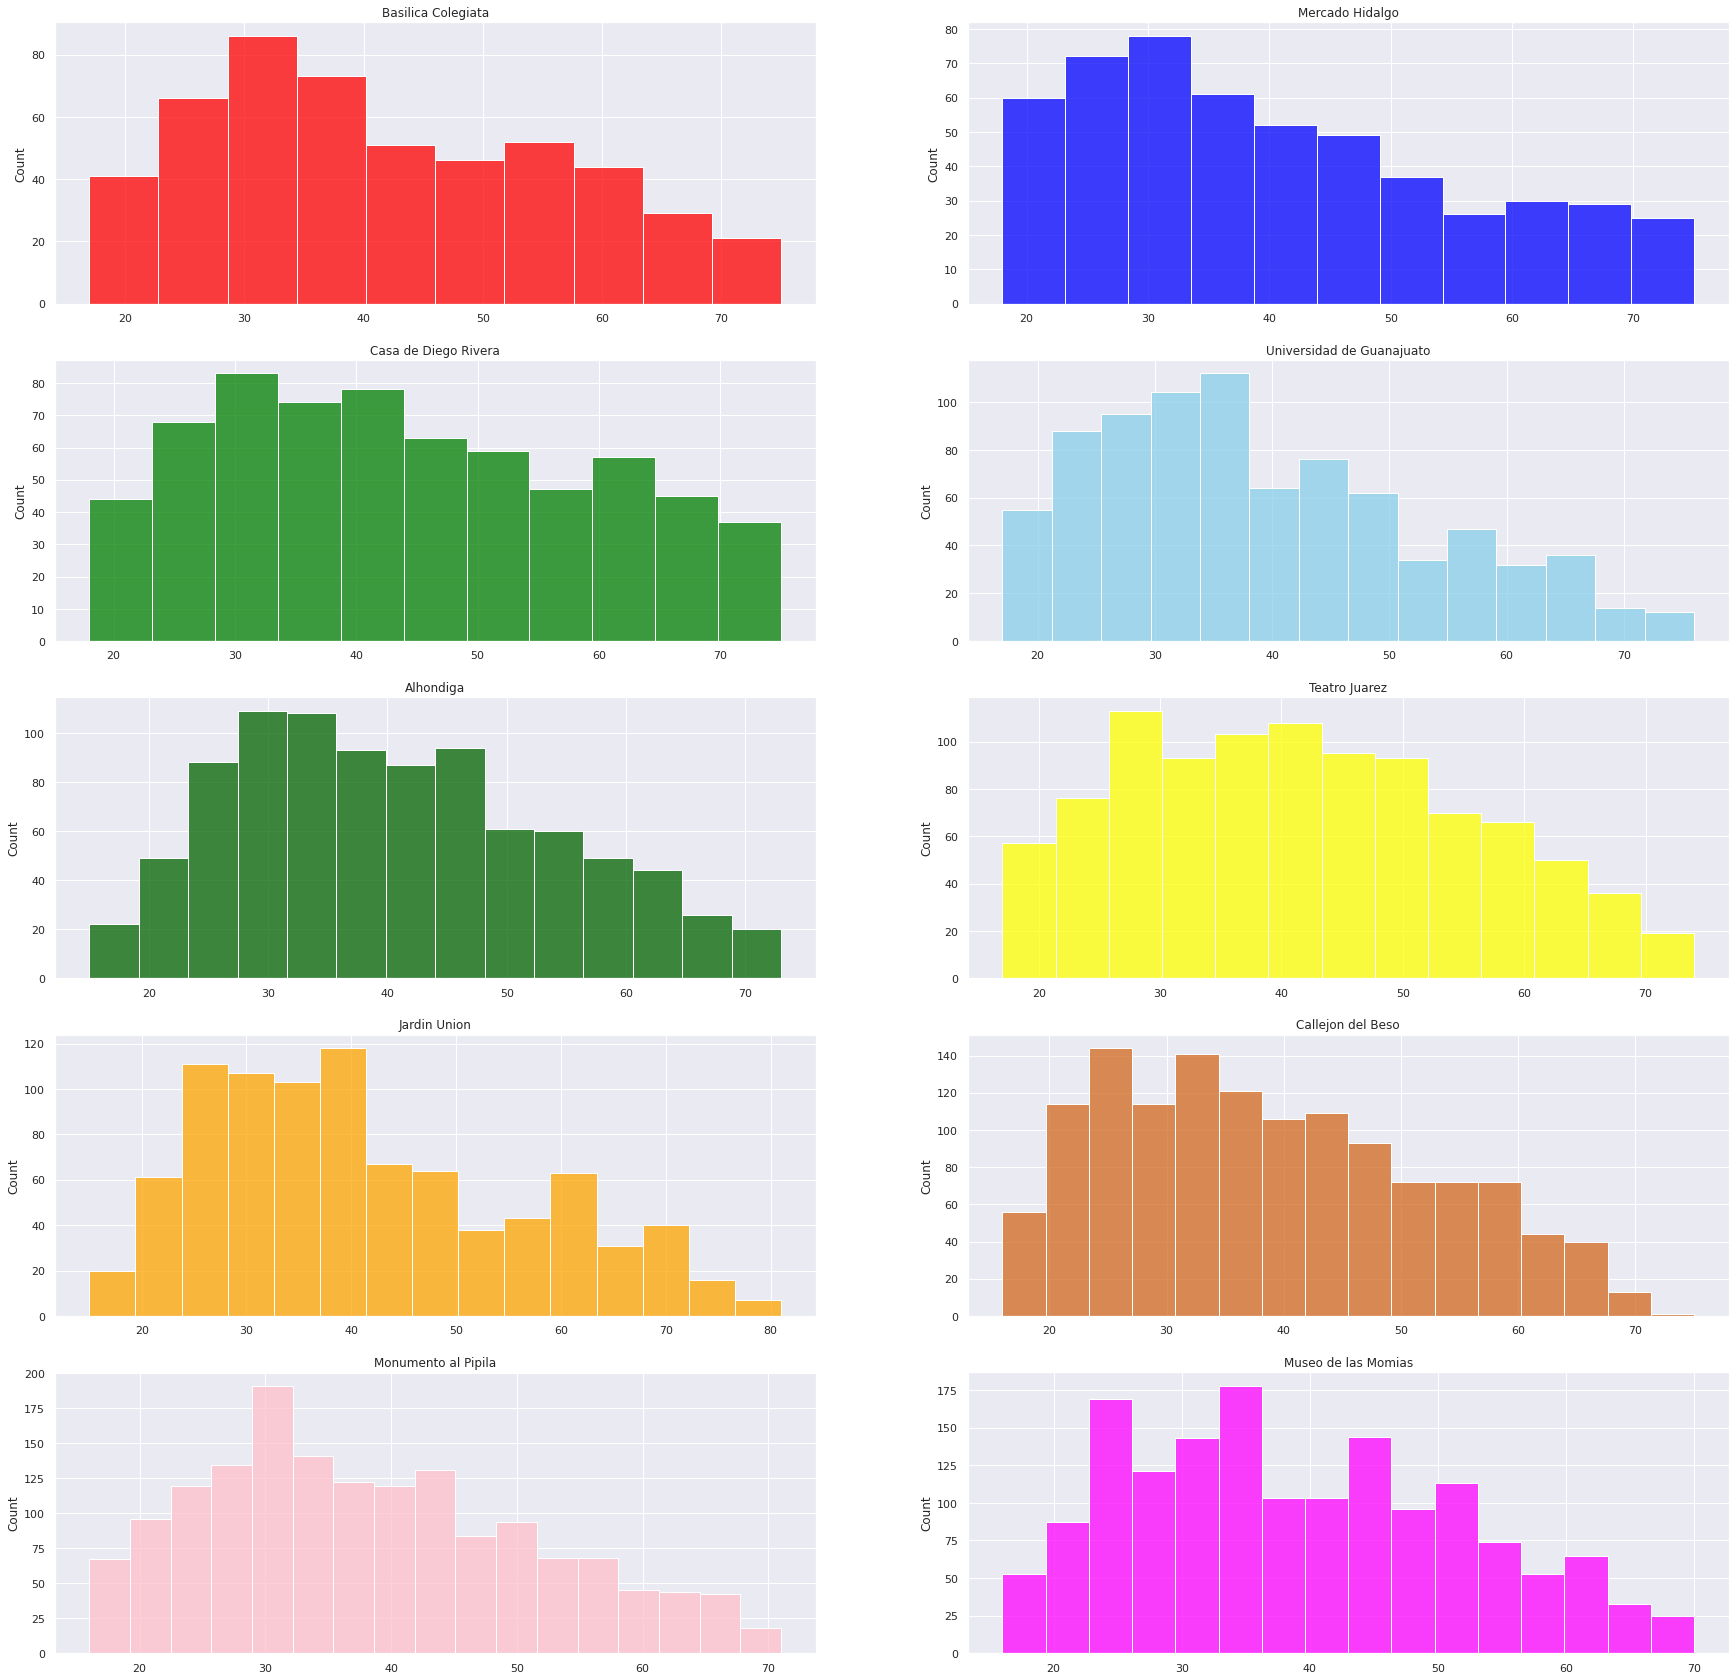

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# get figure and axis
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

colors = ['red', 'blue', 'green', 'skyblue', 'darkgreen', 'yellow', 'orange', 'chocolate', 'pink', 'magenta']
for ds, name, ax, color in zip(datasets, ds_names, axs, colors):
    ages = np.array(list(map(float, ds['Edad'])))
    sns.set_style('darkgrid')
    sns.histplot(ages, ax=ax, color=color).set(title=name)

## Histograma de Cantidad de Personas Nacionales o Internacionales

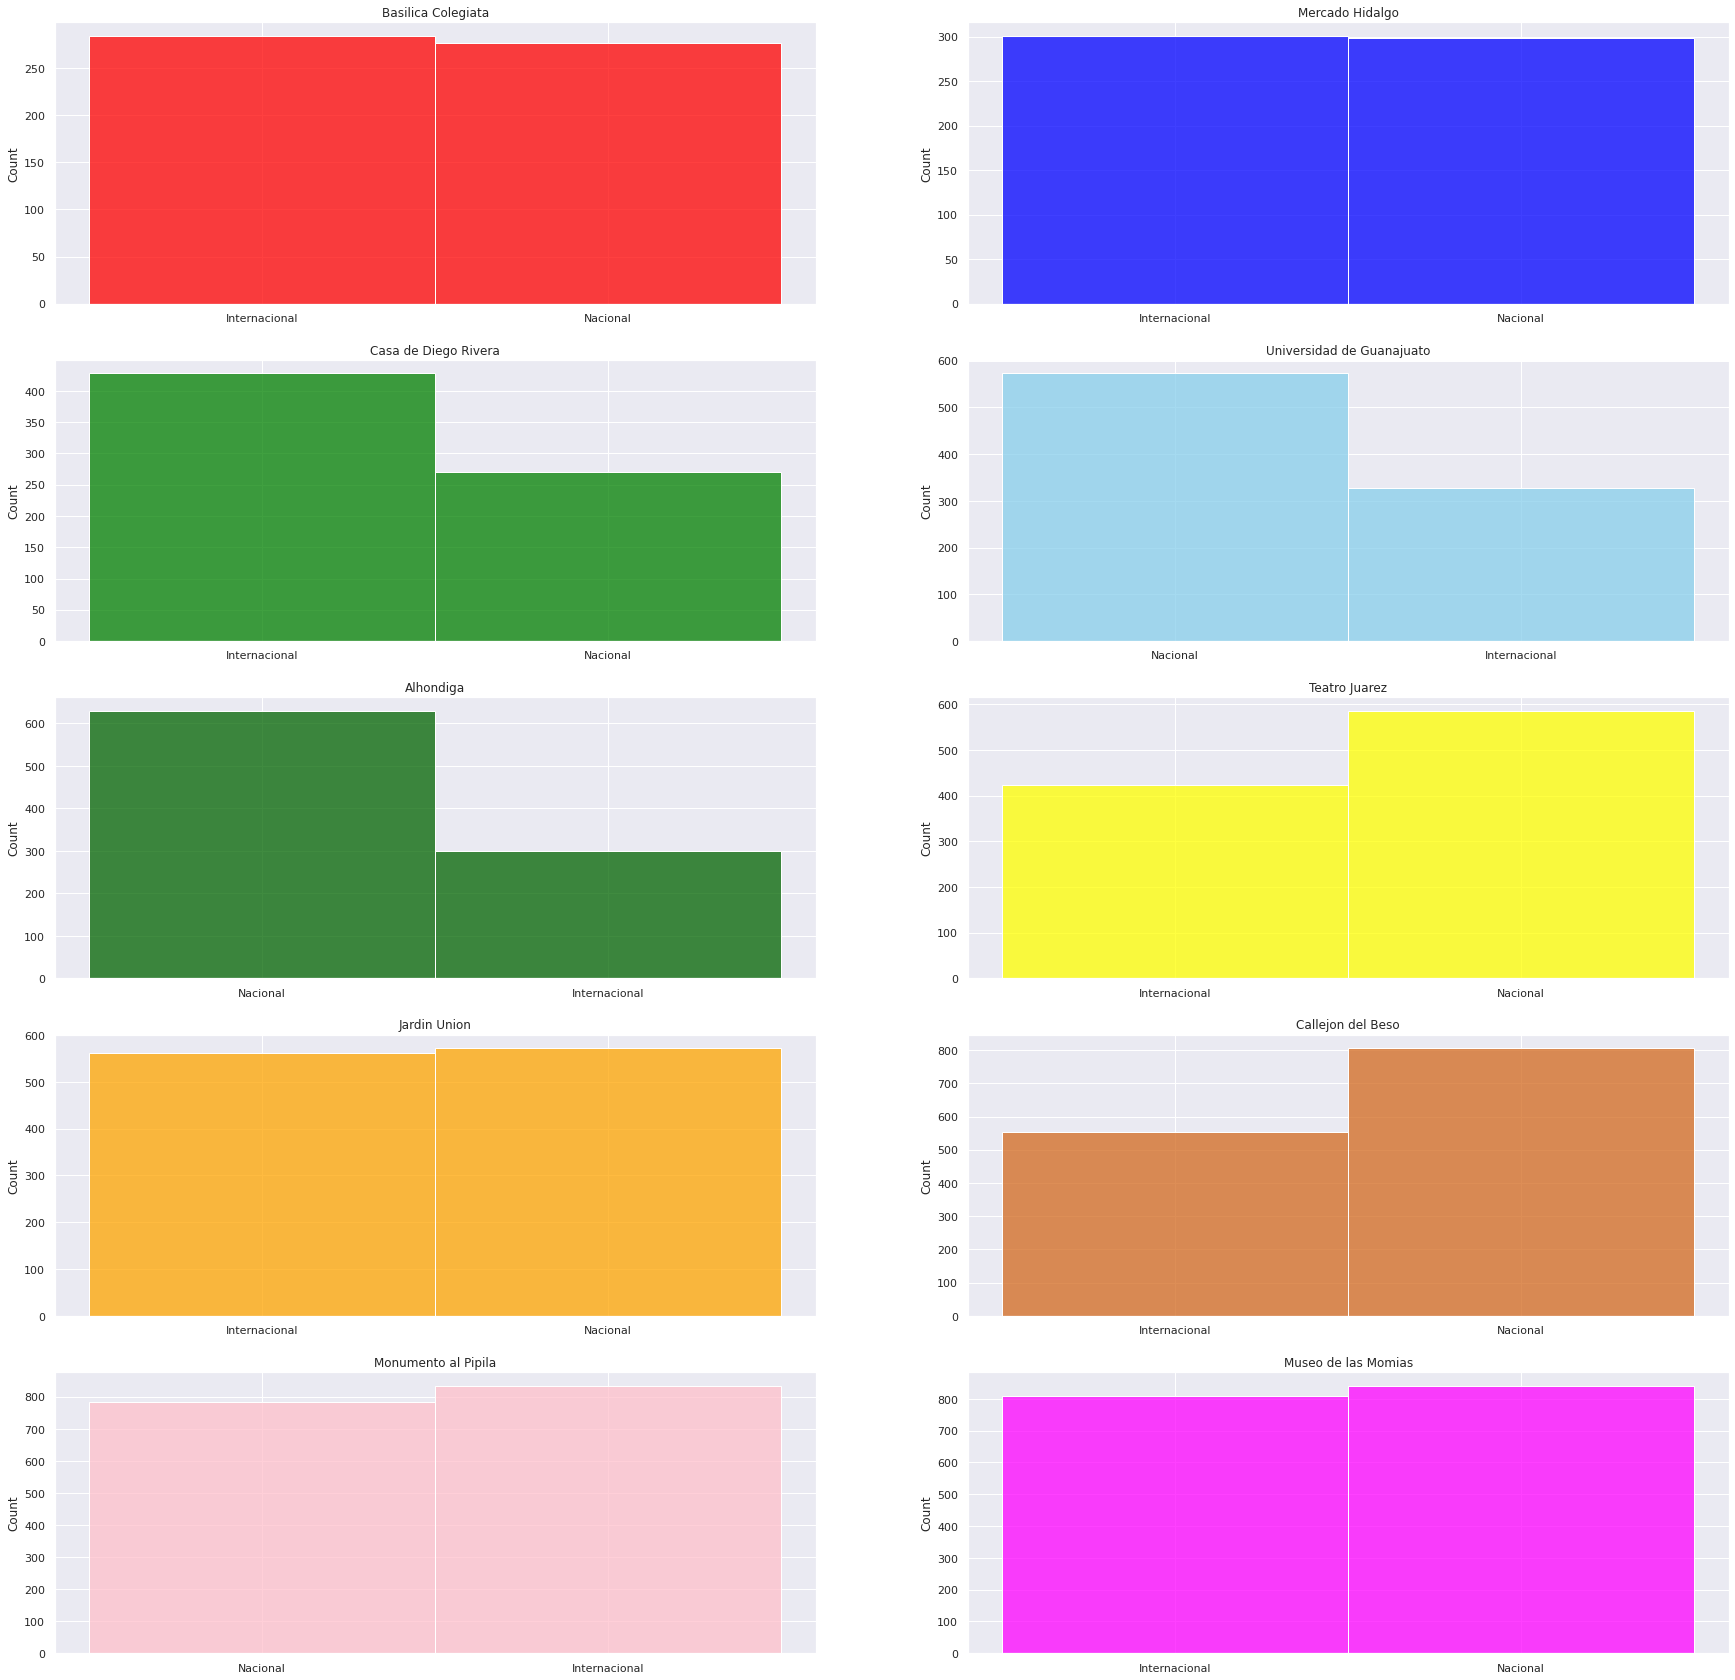

In [23]:
# get figure and axis
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

colors = ['red', 'blue', 'green', 'skyblue', 'darkgreen', 'yellow', 'orange', 'chocolate', 'pink', 'magenta']
for ds, name, ax, color in zip(datasets, ds_names, axs, colors):
    places = list(ds['Nacional ó Internacional'])
    sns.set_style('darkgrid')
    sns.histplot(places, ax=ax, color=color).set(title=name)

## Histograma de Países

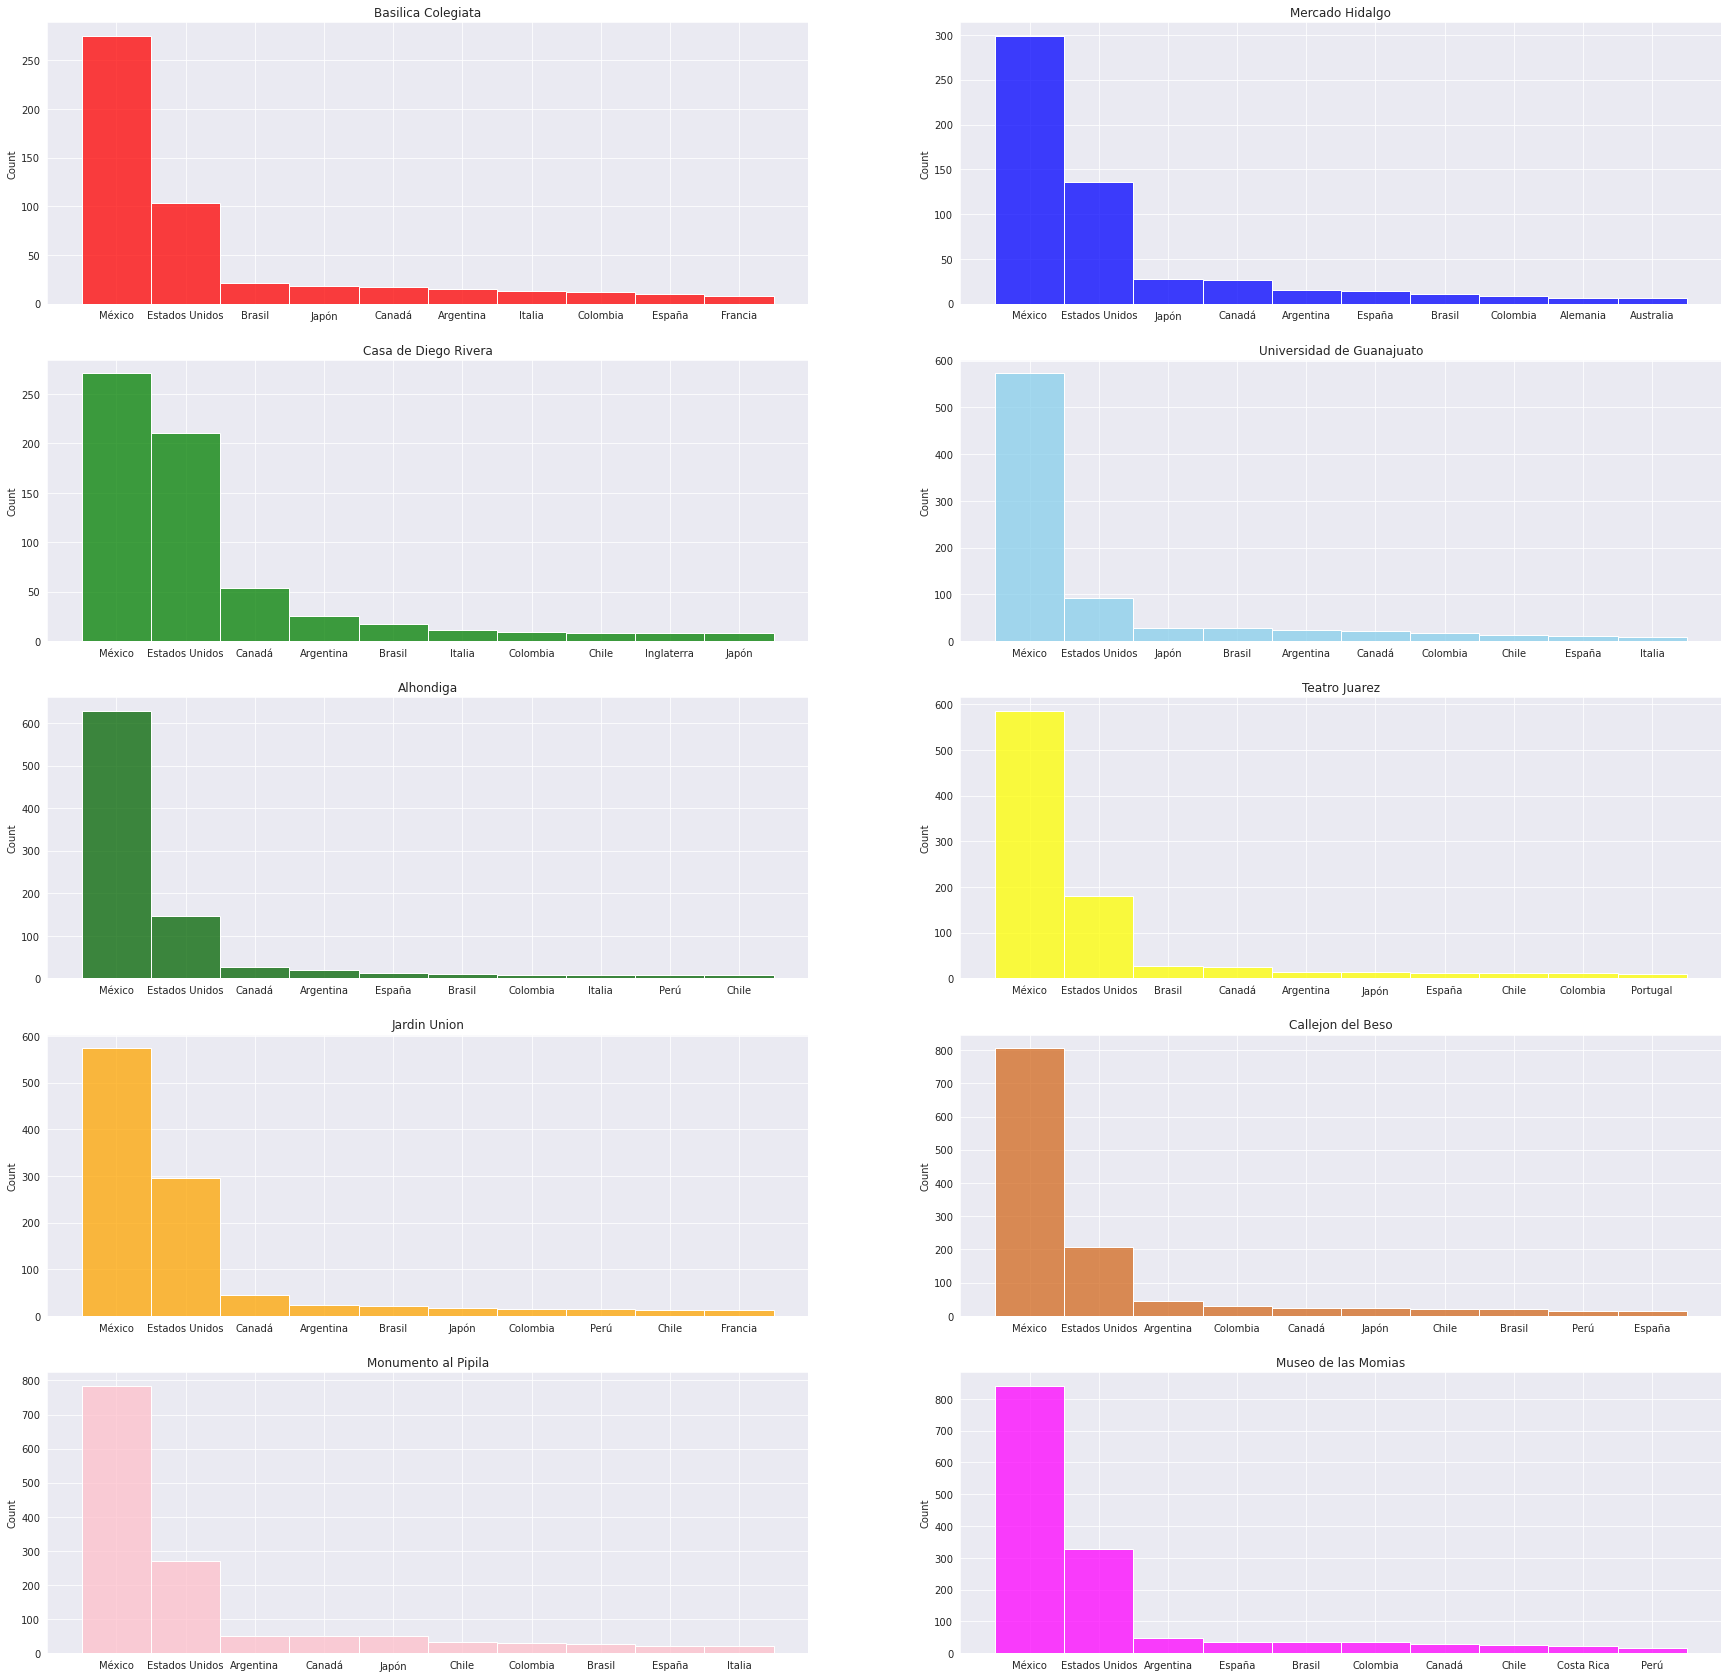

In [131]:
# get figure and axis
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

colors = ['red', 'blue', 'green', 'skyblue', 'darkgreen', 'yellow', 'orange', 'chocolate', 'pink', 'magenta']
for ds, name, ax, color in zip(datasets, ds_names, axs, colors):
    countries = list(ds['País'])
    countries = FreqDist(countries).most_common(10)
    countries = [word for word, count in countries for _ in range(count)]
    sns.set_style('darkgrid')
    sns.histplot(countries, ax=ax, color=color).set(title=name)

## Histograma por Género

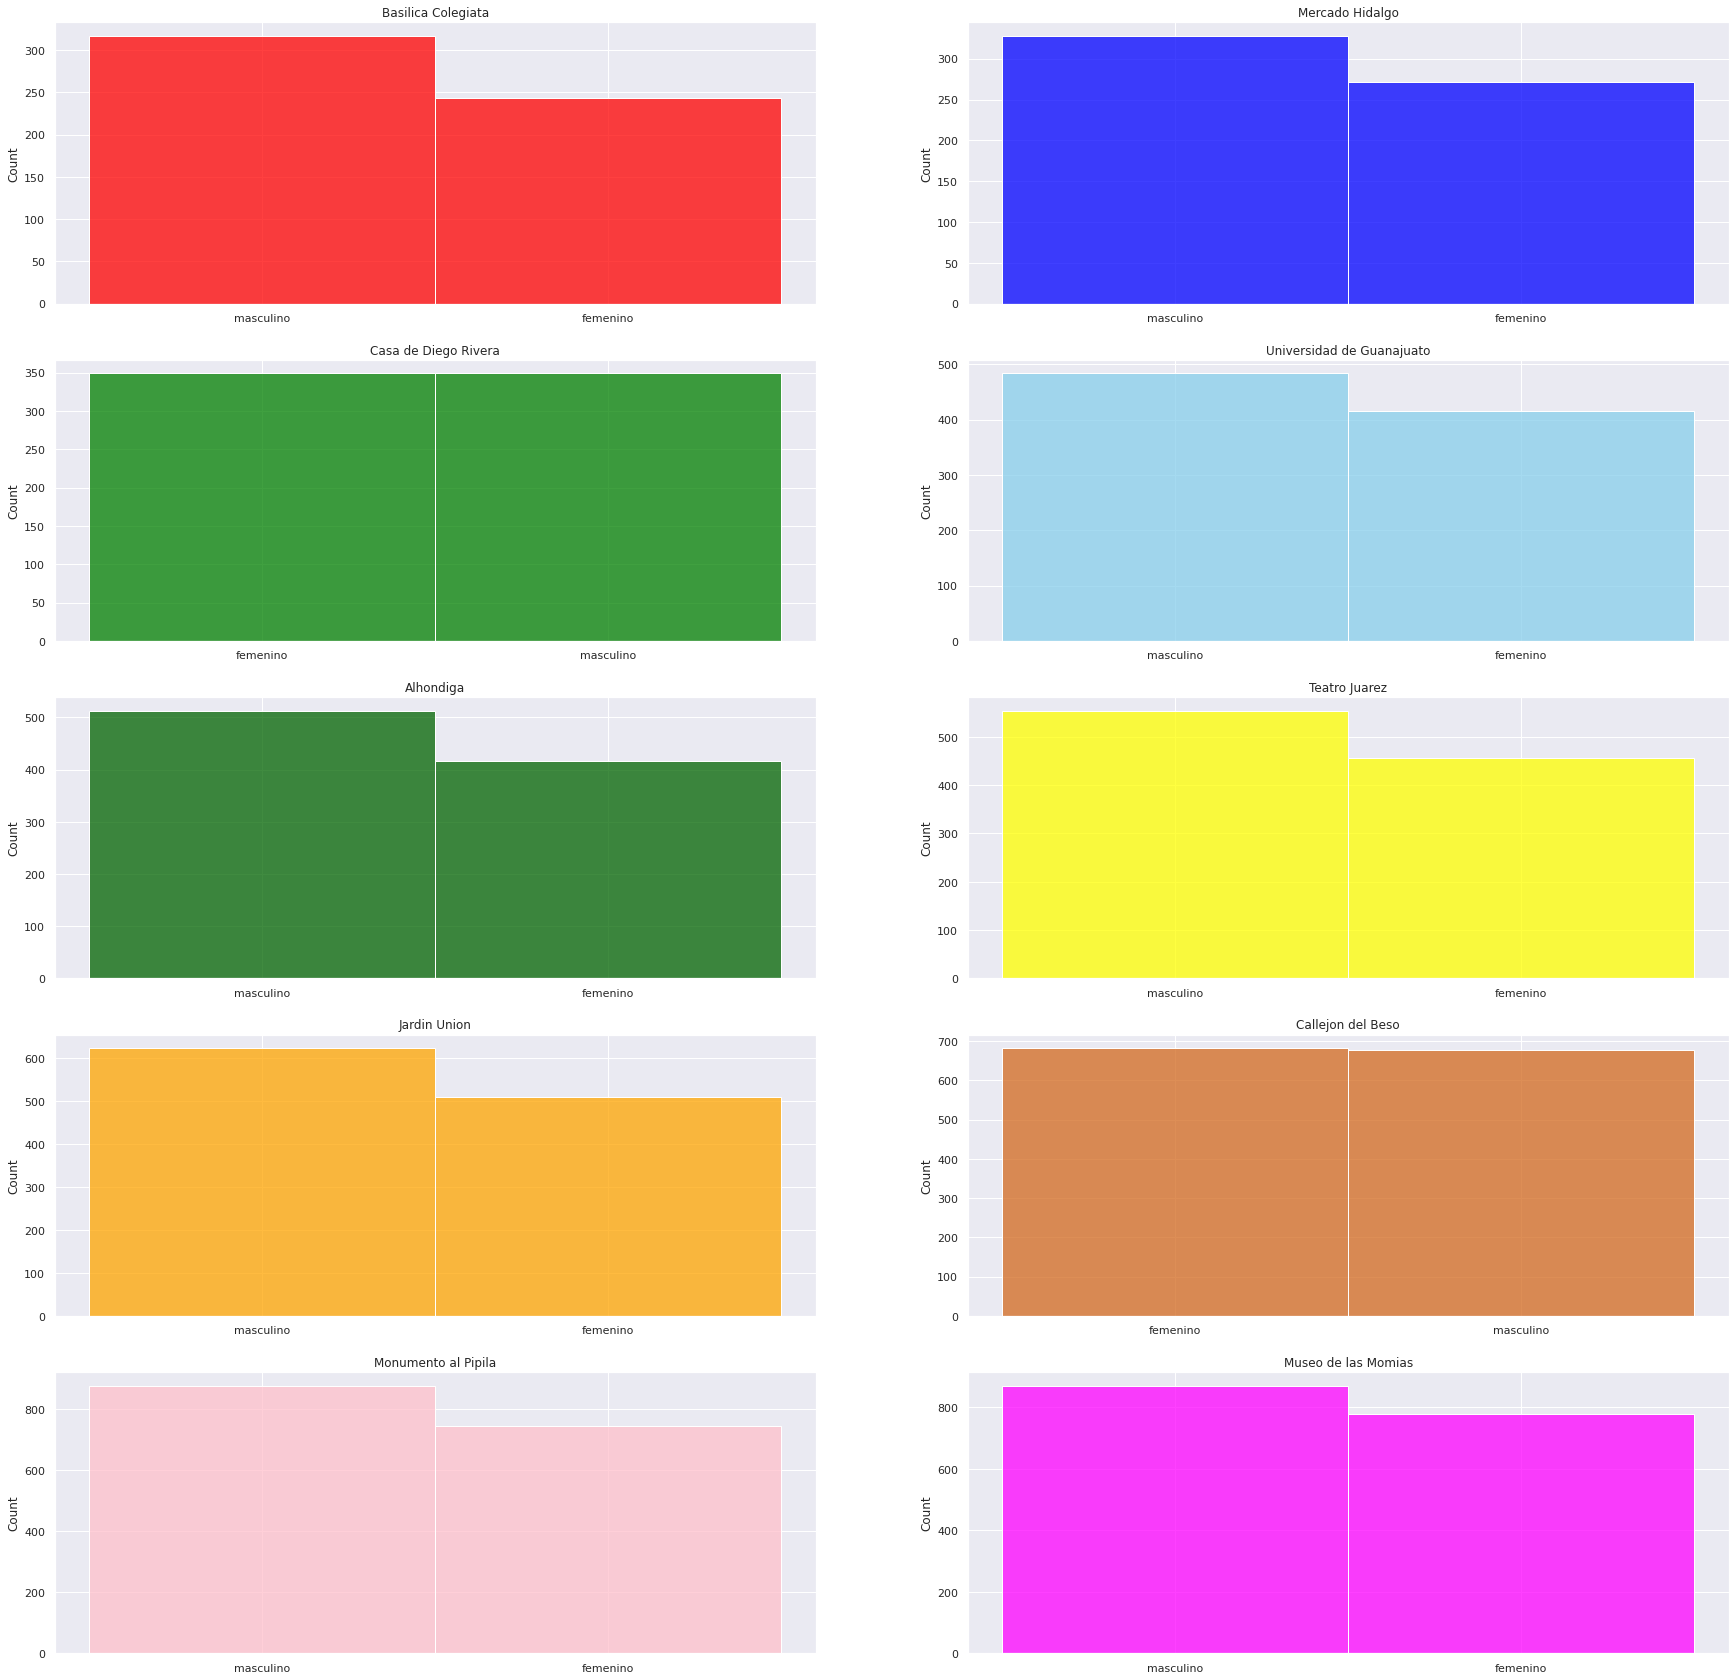

In [26]:
# get figure and axis
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

colors = ['red', 'blue', 'green', 'skyblue', 'darkgreen', 'yellow', 'orange', 'chocolate', 'pink', 'magenta']
for ds, name, ax, color in zip(datasets, ds_names, axs, colors):
    gender = list(ds['Género'])
    gender = [gender_name.lower().strip() for gender_name in gender]
    gender = FreqDist(gender).most_common(10)
    gender = [word for word, count in gender for _ in range(count)]
    sns.set_style('darkgrid')
    sns.histplot(gender, ax=ax, color=color).set(title=name)

# 2. Nubes de Palabras

In [29]:
def get_docs(tokenize=False):
    docs_by_place = []
    labels_by_place = []
    for ds in datasets:
        docs = list(ds['Opinión'])
        # get labels
        scores = np.array(list(map(int, ds['Escala'])))
        scores_mat = np.row_stack((scores>=4, scores==3, scores<3))
        labels = 0 * scores_mat[0] + 1*scores_mat[1] + 2 * scores_mat[2]
        # process docs
        docs = process_documents(docs, tokenize=tokenize)
        # append values
        docs_by_place.append(docs)
        labels_by_place.append(labels)
        
    return docs_by_place, labels_by_place

## Get Docs and Labels By Place

In [30]:
docs_by_place, labels_by_place = get_docs()

In [133]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# get stopwrds
sw = stopwords.words('spanish') + stopwords.words('english')

# get axis for figures
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

for docs, labels, name, ax in zip(docs_by_place, labels_by_place, ds_names, axs):
    _, scores, features = get_features(docs, labels, 50, sw=sw)
    
    frequencies = {}
    for (word, weight) in zip(features, scores):
        frequencies[word] = weight
        
    # Generate a word cloud image
    wordcloud = WordCloud().generate_from_frequencies(frequencies)
    # plot 
    ax.imshow(wordcloud, interpolation='bilinear', )
    ax.axis("off")
    ax.set_title(name)
    

# 3 LSA

In [8]:
def get_docs_from_ds(ds, tokenize=False):
    # process docs
    docs = list(ds['Opinión'])
    docs = process_documents(docs, tokenize=tokenize)
    # get labels
    scores = np.array(list(map(int, ds['Escala'])))
    scores_mat = np.row_stack((scores>=4, scores==3, scores<3))
    labels = 0 * scores_mat[0] + 1*scores_mat[1] + 2 * scores_mat[2]    
    return docs, labels

In [9]:
def get_words(vt, n=10):
    topic1 = np.abs(vt[0])
    topic2 = np.abs(vt[1])
    topic3 = np.abs(vt[2])
    
    topic1_indexes = np.argsort(vt[0])[-n:]
    topic2_indexes = np.argsort(vt[1])[-n:]
    topic3_indexes = np.argsort(vt[2])[-n:]
    return topic1_indexes, topic2_indexes, topic3_indexes

In [45]:
import pandas as pd
def build_word_df(words1, words2, words3):
    data = {'topic 1':[], 'topic 2':[], 'topic 3':[]}
    for w1, w2, w3 in zip(words1, words2, words3):
        data['topic 1'].append(w1)
        data['topic 2'].append(w2)
        data['topic 3'].append(w3)
        
    return pd.DataFrame(data, index=['w ' + str(i+1) for i in range(len(words1))])

## Tópicos para Turistas de Género Masculino

In [46]:
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk.corpus import stopwords

# get stopwrds
sw = stopwords.words('spanish') + stopwords.words('english')

for ds, name in zip(datasets, ds_names):
    selected_ds = ds[ds['Género'] == 'Masculino']
    docs, labels = get_docs_from_ds(selected_ds)
    bow, features = get_bow(docs, T=10000, transform=True, use_idf=True, vocabulary=None, sw=sw)
    svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42).fit(bow)
    VT = svd.components_
    words_i1, words_i2, words_i3 = get_words(VT)
    print(bold_string(name))
    df = build_word_df(features[words_i1], features[words_i2], features[words_i3])
    display(df.T)

Basilica Colegiata 


w 1     w 2       w 3       w 4       w 5    w 6     w 7  \
topic 1  visitar  bonita   hermosa  basílica     lugar  noche  centro   
topic 2    visit    town     great       see  basilica   city     one   
topic 3      vez   pasar  iglesias  obligada        si   vale   lugar   

             w 8     w 9        w 10  
topic 1  iglesia  ciudad  guanajuato  
topic 2   inside  church   beautiful  
topic 3   visita    pena  guanajuato

Mercado Hidalgo 


w 1        w 2        w 3       w 4         w 5      w 6  \
topic 1  precios  recuerdos         si     comer  guanajuato  comprar   
topic 2     many  souvenirs      great  building         buy  mexican   
topic 3   ciudad   mexicano  cualquier   fachada      bonita   típico   

                  w 7     w 8       w 9     w 10  
topic 1    artesanías   lugar    comida  mercado  
topic 2        stalls   place      food   market  
topic 3  arquitectura  bonito  interior  mercado

Casa de Diego Rivera 


w 1          w 2      w 3     w 4        w 5      w 6  \
topic 1       artists  interesting    house    casa       home     work   
topic 2  exposiciones      artista     bien      si       arte    diego   
topic 3         large      mexican  enjoyed  lovely  displayed  artists   

           w 7     w 8     w 9    w 10  
topic 1    art  museum   diego  rivera  
topic 2  lugar   museo   obras    casa  
topic 3   well   works  museum    home

Universidad de Guanajuato 


w 1    w 2      w 3     w 4           w 5        w 6          w 7  \
topic 1  subir  vista  visitar      si  arquitectura   edificio  universidad   
topic 2   view  visit    climb   steps        stairs  beautiful        great   
topic 3   foto    ahí   bonito  muchas         tomar    tomarse        subir   

            w 8         w 9        w 10  
topic 1  ciudad       lugar  guanajuato  
topic 2    city  university    building  
topic 3   fotos        vale        pena

Alhondiga 


w 1          w 2        w 3      w 4         w 5    w 6  \
topic 1     bien       visita         si  visitar  guanajuato  museo   
topic 2     well       mexico      great  spanish    building  place   
topic 3  amantes  emblemático  increíble    mejor        duda  lleno   

                   w 7       w 8      w 9      w 10  
topic 1  independencia    méxico    lugar  historia  
topic 2   independence    museum  mexican   history  
topic 3         ciudad  historia  visitar     lugar

Teatro Juarez 


w 1       w 2       w 3      w 4        w 5           w 6  \
topic 1        si  interior  historia  visitar    hermoso  arquitectura   
topic 2     worth     visit     great    place   building       theatre   
topic 3  obligado      buen     noche  ubicado  histórico        bonito   

            w 7         w 8         w 9     w 10  
topic 1  ciudad  guanajuato       lugar   teatro  
topic 2     see   beautiful      inside  theater  
topic 3  centro     visitar  guanajuato    lugar

Jardin Union 


w 1     w 2     w 3     w 4     w 5         w 6     w 7  \
topic 1  restaurants   place   plaza  jardin  jardín      ciudad  teatro   
topic 2        night   watch  jardin  around     one       music   great   
topic 3      corazón  juárez  juarez  jardín  frente  guanajuato  centro   

                 w 8           w 9    w 10  
topic 1   guanajuato  restaurantes   lugar  
topic 2  restaurants        people   place  
topic 3       teatro         plaza  ciudad

Callejon del Beso 


w 1         w 2      w 3     w 4         w 5       w 6     w 7  \
topic 1       ir        foto  leyenda  pareja  guanajuato  historia      si   
topic 2  picture  guanajuato       go     see        take     place   story   
topic 3     mala        años   pareja  visita      suerte   leyenda  tercer   

             w 8       w 9   w 10  
topic 1     beso  callejón  lugar  
topic 2      one      kiss  alley  
topic 3  escalón  callejón   beso

Monumento al Pipila 


w 1         w 2        w 3        w 4     w 5        w 6  \
topic 1   puede          si     pípila     puedes   subir      lugar   
topic 2   views         get       walk  funicular   great        top   
topic 3  subida  teleférico  monumento      bajar  arriba  caminando   

               w 7         w 8    w 9    w 10  
topic 1  monumento  guanajuato  vista  ciudad  
topic 2       take    monument   city    view  
topic 3  funicular       subir   pena    vale

Museo de las Momias 


w 1   w 2          w 3     w 4    w 5          w 6       w 7  \
topic 1  cuerpos    ir  interesante  visita    ver           si     lugar   
topic 2     like   one       bodies  people  visit  interesting     place   
topic 3       si  buen        lleno     vas     ir      visitar  obligada   

                w 8      w 9    w 10  
topic 1  guanajuato   momias   museo  
topic 2         see  mummies  museum  
topic 3  guanajuato   visita   lugar

## Tópicos para Turistas de Género Femenino

In [47]:
for ds, name in zip(datasets, ds_names):
    selected_ds = ds[ds['Género'] == 'Femenino']
    docs, labels = get_docs_from_ds(selected_ds)
    bow, features = get_bow(docs, T=10000, transform=True, use_idf=True, vocabulary=None, sw=sw)
    svd = TruncatedSVD(n_components=3, n_iter=7, random_state=42).fit(bow)
    VT = svd.components_
    words_i1, words_i2, words_i3 = get_words(VT)
    print(bold_string(name))
    df = build_word_df(features[words_i1], features[words_i2], features[words_i3])
    display(df.T)

Basilica Colegiata 


w 1     w 2       w 3     w 4         w 5       w 6  \
topic 1  arquitectura  bonita     noche  dentro      centro  basílica   
topic 2       amazing   visit      must    city  guanajuato  basilica   
topic 3       visitar  centro  basílica    vale        pena    ciudad   

                w 7      w 8         w 9       w 10  
topic 1     iglesia  hermosa  guanajuato     ciudad  
topic 2      church      see      inside  beautiful  
topic 3  conservada     bien      bonita     dentro

Mercado Hidalgo 


w 1      w 2     w 3           w 4     w 5        w 6  \
topic 1  precios     buen   comer    artesanías  dulces    comprar   
topic 2    place     lots   visit        stalls   local  souvenirs   
topic 3    puede  puestos  venden  arquitectura    baja       alta   

                w 7       w 8      w 9     w 10  
topic 1          si    comida    lugar  mercado  
topic 2         buy     great     food   market  
topic 3  artesanías  edificio  mercado   planta

Casa de Diego Rivera 


w 1       w 2          w 3       w 4       w 5        w 6    w 7  \
topic 1     well      home  interesting      work     house        art    see   
topic 2  conocer     vivió         obra  artistas  pinturas      diego  lugar   
topic 3      art  exhibits     sketches   enjoyed    seeing  childhood   also   

            w 8    w 9    w 10  
topic 1  museum  diego  rivera  
topic 2   museo  obras    casa  
topic 3   works   home    work

Universidad de Guanajuato 


w 1      w 2        w 3    w 4     w 5           w 6     w 7  \
topic 1      subir  hermosa  escaleras  vista   lugar  arquitectura  ciudad   
topic 2      steps    worth        top   view   great  architecture  stairs   
topic 3  escalones   ciudad  visitarla  vista  entrar        dentro   subir   

                w 8         w 9         w 10  
topic 1    edificio  guanajuato  universidad  
topic 2  university   beautiful     building  
topic 3      bonita        vale         pena

Alhondiga 


w 1      w 2     w 3        w 4            w 5         w 6  \
topic 1     edificio  visitar      si    conocer  independencia  guanajuato   
topic 2  interesting    visit  mexico       well          place     spanish   
topic 3        lleno  visitar  méxico  excelente     guanajuato  importante   

              w 7       w 8      w 9      w 10  
topic 1    méxico     museo    lugar  historia  
topic 2  building   mexican   museum   history  
topic 3     parte  historia  conocer     lugar

Teatro Juarez 


w 1          w 2           w 3      w 4       w 5       w 6  \
topic 1    si       dentro  arquitectura     vale      pena  historia   
topic 2  time  performance         worth  theatre  building        go   
topic 3   ver       dentro        teatro       si      bien     pagar   

                w 7      w 8    w 9       w 10  
topic 1  guanajuato  hermoso  lugar     teatro  
topic 2      inside  theater    see  beautiful  
topic 3   conocerlo   entrar   vale       pena

Jardin Union 


w 1     w 2        w 3     w 4           w 5     w 6     w 7  \
topic 1  alrededor  música  disfrutar   place         gente  teatro  jardín   
topic 2      trees    lots        sit  around         watch   great   music   
topic 3  alrededor  juarez     jardín  centro  restaurantes   plaza  ciudad   

                 w 8           w 9    w 10  
topic 1   guanajuato  restaurantes   lugar  
topic 2  restaurants        people   place  
topic 3       frente        juárez  teatro

Callejon del Beso 


w 1       w 2       w 3     w 4         w 5    w 6       w 7  \
topic 1    ir   leyenda  historia  pareja  guanajuato   foto      beso   
topic 2  must  romantic     visit    take         one  place        go   
topic 3  pena   lugares     dejar  puedes      bonito  mucha  historia   

             w 8       w 9   w 10  
topic 1       si  callejón  lugar  
topic 2    story     alley   kiss  
topic 3  visitar     gente  lugar

Monumento al Pipila 


w 1        w 2     w 3     w 4     w 5        w 6        w 7  \
topic 1  toda         si  pípila   subir  puedes      lugar  monumento   
topic 2  walk        top     get   great     see         go       take   
topic 3    si  funicular  teatro  juárez  llegar  caminando      tomar   

                w 8    w 9    w 10  
topic 1  guanajuato  vista  ciudad  
topic 2    monument   city    view  
topic 3  teleférico  subir  puedes

Museo de las Momias 


w 1     w 2          w 3     w 4     w 5         w 6  \
topic 1   historia  visita  interesante    bien     ver  guanajuato   
topic 2        one    like        visit  people  bodies       place   
topic 3  agradable   buena           ir   mucha  típico       gente   

                 w 7       w 8      w 9    w 10  
topic 1        lugar        si   momias   museo  
topic 2  interesting       see  mummies  museum  
topic 3       bonito  historia     buen   lugar

## Tópicos para Turistas Nacionales

In [48]:
from IPython.display import display
for ds, name in zip(datasets, ds_names):
    selected_ds = ds[ds['Nacional ó Internacional'] == 'Nacional']
    docs, labels = get_docs_from_ds(selected_ds)
    bow, features = get_bow(docs, T=10000, transform=True, use_idf=True, vocabulary=None, sw=sw)
    svd = TruncatedSVD(n_components=3, n_iter=20, random_state=42).fit(bow)
    VT = svd.components_
    words_i1, words_i2, words_i3 = get_words(VT)
    print(bold_string(name))
    df = build_word_df(features[words_i1], features[words_i2], features[words_i3])
    display(df.T)

Basilica Colegiata 


w 1           w 2       w 3       w 4      w 5     w 6    w 7  \
topic 1   noche  arquitectura   iglesia  basílica   bonita  centro  lugar   
topic 2  entrar     visitarla  basílica     noche  hermosa    bien   pena   
topic 3   mejor        dentro   hermoso     lugar     vale    bien     si   

             w 8     w 9        w 10  
topic 1  hermosa  ciudad  guanajuato  
topic 2     vale  dentro      bonita  
topic 3     pena  bonita  guanajuato

Mercado Hidalgo 


w 1      w 2    w 3      w 4      w 5         w 6       w 7  \
topic 1  guanajuato  precios  comer   dulces  comprar  artesanías        si   
topic 2      frutas   comida  puede  puestos  mercado        baja  interior   
topic 3  guanajuato     find    buy    great    local        food     place   

               w 8         w 9     w 10  
topic 1      lugar      comida  mercado  
topic 2       alta  artesanías   planta  
topic 3  souvenirs      market  mercado

Casa de Diego Rivera 


w 1        w 2           w 3       w 4          w 5      w 6  \
topic 1  artistas         si  exposiciones      arte        lugar    museo   
topic 2      home      works        museum     diego  interesting      see   
topic 3  mexicano  visitarlo       artista  pinturas   originales  maestro   

            w 7     w 8   w 9   w 10  
topic 1   obras  rivera  casa  diego  
topic 2  rivera    work   art  house  
topic 3  muchas    gran  pena   vale

Universidad de Guanajuato 


w 1        w 2     w 3      w 4       w 5           w 6  \
topic 1  visitar  escaleras      si    vista  edificio  arquitectura   
topic 2      ahí    hermosa  entrar    tomar    llegar         fotos   
topic 3     pena       buen    vale  conocer  recuerdo        bonito   

               w 7          w 8    w 9        w 10  
topic 1     ciudad  universidad  lugar  guanajuato  
topic 2  escalones        subir   vale        pena  
topic 3    tomarse         foto  fotos       lugar

Alhondiga 


w 1      w 2         w 3    w 4         w 5            w 6  \
topic 1         bien   visita     visitar     si  guanajuato  independencia   
topic 2  interesante  entrada     murales  salas        bien             si   
topic 3        bello   además  conservado  parte       salas       edificio   

              w 7    w 8     w 9           w 10  
topic 1    méxico  museo   lugar       historia  
topic 2  edificio  museo    vale           pena  
topic 3      bien  museo  méxico  independencia

Teatro Juarez 


w 1      w 2        w 3          w 4           w 5  \
topic 1      visitar     vale       pena       dentro  arquitectura   
topic 2     interior  hermoso       bien        pagar        dentro   
topic 3  interesante     bien  excelente  explicación         guías   

               w 6        w 7         w 8       w 9   w 10  
topic 1   historia    hermoso  guanajuato    teatro  lugar  
topic 2  conocerlo  visitarlo      entrar      vale   pena  
topic 3      lleno       pena        vale  historia  lugar

Jardin Union 


w 1         w 2     w 3     w 4     w 5     w 6         w 7  \
topic 1  disfrutar       gente  música   pasar  ciudad  teatro      jardín   
topic 2     juárez      ciudad  frente  juarez  people   place  guanajuato   
topic 3       good  surrounded  jardin    buen   pasar   great       music   

                w 8           w 9         w 10  
topic 1  guanajuato  restaurantes        lugar  
topic 2       plaza   restaurants       teatro  
topic 3      people         place  restaurants

Callejon del Beso 


w 1      w 2        w 3       w 4         w 5      w 6     w 7  \
topic 1     ir  leyenda       foto  historia  guanajuato   pareja      si   
topic 2   mala     años  tradición   leyenda      pareja   suerte  tercer   
topic 3  dejar   ciudad  romántico    pareja   tradición  visitar      si   

                w 8       w 9   w 10  
topic 1        beso  callejón  lugar  
topic 2    callejón   escalón   beso  
topic 3  guanajuato       vas  lugar

Monumento al Pipila 


w 1     w 2         w 3     w 4       w 5         w 6      w 7  \
topic 1  funicular  pípila          si   subir    puedes   monumento    lugar   
topic 2    hermosa   fotos      bonito  ciudad  historia  panorámica  visitar   
topic 3        see   worth  guanajuato  pipila  monument         get     take   

                w 8         w 9    w 10  
topic 1  guanajuato       vista  ciudad  
topic 2        toda  guanajuato   lugar  
topic 3          go        view    city

Museo de las Momias 


w 1          w 2          w 3         w 4    w 5     w 6    w 7  \
topic 1  bien           ir  interesante      visita    ver      si  lugar   
topic 2   one  interesting         like  guanajuato  place  people  visit   
topic 3  guía        gente         hora        vale   pena  entrar  museo   

                w 8        w 9    w 10  
topic 1  guanajuato     momias   museo  
topic 2     mummies        see  museum  
topic 3     minutos  recorrido    fila

## Tópicos para Turistas Internacionales

In [49]:
for ds, name in zip(datasets, ds_names):
    selected_ds = ds[ds['Nacional ó Internacional'] == 'Internacional']
    docs, labels = get_docs_from_ds(selected_ds)
    bow, features = get_bow(docs, T=10000, transform=True, use_idf=True, vocabulary=None, sw=sw)
    svd = TruncatedSVD(n_components=3, n_iter=20, random_state=42).fit(bow)
    VT = svd.components_
    words_i1, words_i2, words_i3 = get_words(VT)
    print(bold_string(name))
    df = build_word_df(features[words_i1], features[words_i2], features[words_i3])
    display(df.T)

Basilica Colegiata 


w 1    w 2     w 3       w 4       w 5      w 6          w 7  \
topic 1   visit   must     one       see      city   church     basilica   
topic 2   plaza    día  dentro  amarillo  basílica  hermosa       centro   
topic 3  dentro  plaza     aún   hermosa     bella   inside  iluminación   

                w 8      w 9       w 10  
topic 1  guanajuato   inside  beautiful  
topic 2       noche  iglesia     ciudad  
topic 3      church      día      noche

Mercado Hidalgo 


w 1       w 2    w 3    w 4    w 5        w 6      w 7     w 8  \
topic 1    like  building  visit  great    buy  souvenirs    place  stalls   
topic 2    aquí      gran   buen  puede  comer  recuerdos  comprar  comida   
topic 3  second    street  worth   look   many     indoor    large   local   

           w 9     w 10  
topic 1   food   market  
topic 2  lugar  mercado  
topic 3  floor   market

Casa de Diego Rivera 


w 1      w 2          w 3          w 4          w 5    w 6  \
topic 1   well    house  interesting          see         home   work   
topic 2   obra  artista        nació  interesante       rivera  lugar   
topic 3  first    rooms        lived         born  interesting  spent   

               w 7    w 8     w 9    w 10  
topic 1        art  diego  museum  rivera  
topic 2      diego  obras   museo    casa  
topic 3  paintings  years     see   house

Universidad de Guanajuato 


w 1      w 2        w 3     w 4         w 5       w 6  \
topic 1         great  hermosa  beautiful  stairs  university  building   
topic 2  architecture    worth       nice   steps        city     great   
topic 3         worth   pipila    hermosa    pena        vale      view   

               w 7       w 8         w 9         w 10  
topic 1     ciudad  edificio  guanajuato  universidad  
topic 2  beautiful    stairs  university     building  
topic 3      vista     great         top       stairs

Alhondiga 


w 1     w 2      w 3       w 4         w 5            w 6  \
topic 1  murals  mexico     well   spanish       place   independence   
topic 2    bien  ciudad  conocer  edificio  guanajuato  independencia   
topic 3    must    city     much       lot         see         museum   

              w 7      w 8      w 9      w 10  
topic 1  building   museum  mexican   history  
topic 2     museo   méxico    lugar  historia  
topic 3    really  history    learn     place

Teatro Juarez 


w 1      w 2         w 3      w 4       w 5      w 6      w 7  \
topic 1       great       go  guanajuato    worth  building  theatre   inside   
topic 2  guanajuato  visitar        vale   visita    ciudad     pena  hermoso   
topic 3  absolutely    entry       pesos  spanish      make     sure    small   

                  w 8        w 9     w 10  
topic 1           see  beautiful  theater  
topic 2  arquitectura      lugar   teatro  
topic 3            35        fee  theatre

Jardin Union 


w 1    w 2     w 3     w 4     w 5       w 6    w 7  \
topic 1         sit    one  around   watch  jardin     music  great   
topic 2  guanajuato  gente  jardín  centro   noche    teatro  plaza   
topic 3       relax    day   music   enjoy   night  watching  watch   

                 w 8     w 9          w 10  
topic 1  restaurants  people         place  
topic 2       ciudad   lugar  restaurantes  
topic 3       people   place         great

Callejon del Beso 


w 1     w 2     w 3      w 4     w 5    w 6         w 7  \
topic 1    picture    beso      go    place    take    one  guanajuato   
topic 2         ir  ciudad    foto  leyenda  pareja   beso    historia   
topic 3  balconies     two  puedes     foto     vas  alley          si   

             w 8       w 9   w 10  
topic 1    story      kiss  alley  
topic 2       si  callejón  lugar  
topic 3  visitar        ir  lugar

Monumento al Pipila 


w 1        w 2     w 3     w 4       w 5        w 6     w 7  \
topic 1   top  monumento    take   vista  monument  funicular  ciudad   
topic 2  toda      puede  pípila  puedes       ver      subir   lugar   
topic 3   vez   nocturna      ir  puedes       día      subir   noche   

                w 8      w 9    w 10  
topic 1  guanajuato     city    view  
topic 2   monumento    vista  ciudad  
topic 3  teleférico  paisaje     ver

Museo de las Momias 


w 1      w 2          w 3         w 4     w 5    w 6  \
topic 1  guanajuato      one       people       visit  bodies  place   
topic 2      visita  cuerpos  interesante  guanajuato     ver     si   
topic 3         pay   buried    preserved   mummified  really  place   

                 w 7   w 8     w 9     w 10  
topic 1  interesting   see  museum  mummies  
topic 2        lugar  bien   museo   momias  
topic 3         like  dead  bodies   people

## Tópicos para Turistas Jóvenes entre 20 y 30 años

In [59]:
for ds, name in zip(datasets, ds_names):
    selected_ds = ds[ds['Edad'] <=30]
    selected_ds = selected_ds[selected_ds['Edad']>=20]
    docs, labels = get_docs_from_ds(selected_ds)
    bow, features = get_bow(docs, T=10000, transform=True, use_idf=True, vocabulary=None, sw=sw)
    svd = TruncatedSVD(n_components=3, n_iter=20, random_state=42).fit(bow)
    VT = svd.components_
    words_i1, words_i2, words_i3 = get_words(VT)
    print(bold_string(name))
    df = build_word_df(features[words_i1], features[words_i2], features[words_i3])
    display(df.T)

Basilica Colegiata 


w 1        w 2     w 3           w 4     w 5     w 6       w 7  \
topic 1  bonita    hermosa   lugar  arquitectura  dentro   noche  basílica   
topic 2     get       well  around          must   visit  inside       one   
topic 3   resto  caminando  además        ciudad   bella    toda      pena   

             w 8       w 9        w 10  
topic 1  iglesia    ciudad  guanajuato  
topic 2   church  basilica   beautiful  
topic 3     vale    bonita      dentro

Mercado Hidalgo 


w 1      w 2        w 3      w 4         w 5         w 6  \
topic 1   ciudad  precios     dulces    comer     comprar  artesanías   
topic 2    visit      one      items  mexican          go       floor   
topic 3  tambien   bonito  alimentos     tipo  artesanías  guanajuato   

                 w 7     w 8     w 9     w 10  
topic 1           si   lugar  comida  mercado  
topic 2  traditional   place  market     food  
topic 3      comprar  precio    buen    lugar

Casa de Diego Rivera 


w 1         w 2      w 3     w 4       w 5    w 6    w 7   w 8  \
topic 1   lugar    artistas     vale    pena  pinturas  museo  obras  casa   
topic 2   small  collection    place    home     visit  house    see  work   
topic 3  arriba     maestro  pintura  muchas  pinturas  parte   gran  obra   

            w 9   w 10  
topic 1  rivera  diego  
topic 2  museum    art  
topic 3    pena   vale

Universidad de Guanajuato 


w 1     w 2           w 3        w 4          w 5       w 6  \
topic 1          si   subir  arquitectura  escaleras        vista  edificio   
topic 2     caminar  méxico         única   pasillos  universidad    entrar   
topic 3  escalinata     top          city      visit        lugar    stairs   

                  w 7          w 8         w 9     w 10  
topic 1        ciudad  universidad  guanajuato    lugar  
topic 2  arquitectura     edificio        vale     pena  
topic 3     beautiful     building  guanajuato  visitar

Alhondiga 


w 1      w 2            w 3     w 4           w 5      w 6  \
topic 1  interesante  murales  independencia      si        méxico  visitar   
topic 2     building     must    interesting  mexico  independence      see   
topic 3  interesante     bien         tiempo   salas        entrar  murales   

                w 7      w 8     w 9      w 10  
topic 1  guanajuato    museo   lugar  historia  
topic 2       place  mexican  museum   history  
topic 3    edificio     pena    vale        si

Teatro Juarez 


w 1     w 2       w 3           w 4       w 5           w 6  \
topic 1   ciudad  dentro  historia  arquitectura      vale          pena   
topic 2  theatre      go     night       theater     place  architecture   
topic 3    noche  ciudad    bonito       lugares  obligado        limpio   

                w 7      w 8         w 9    w 10  
topic 1  guanajuato  hermoso       lugar  teatro  
topic 2      inside    worth   beautiful     see  
topic 3        duda  visitar  guanajuato   lugar

Jardin Union 


w 1      w 2         w 3        w 4     w 5         w 6  \
topic 1         ciudad   bonito      música     juárez   gente  guanajuato   
topic 2        benches   around  surrounded  beautiful   music      people   
topic 3  callejoneadas  hoteles       plaza     juarez  jardín      centro   

               w 7     w 8           w 9         w 10  
topic 1     jardín  teatro  restaurantes        lugar  
topic 2      great   place        jardin  restaurants  
topic 3  alrededor  juárez        frente       teatro

Callejon del Beso 


w 1         w 2         w 3      w 4     w 5       w 6     w 7  \
topic 1  leyenda        foto  guanajuato       ir  pareja  historia    beso   
topic 2     must  guanajuato       visit     take   story       one    kiss   
topic 3    fotos     tomarte         ahí  escalón   subir     tomar  balcón   

              w 8   w 9      w 10  
topic 1  callejón    si     lugar  
topic 2     alley    go     place  
topic 3     gente  foto  historia

Monumento al Pipila 


w 1     w 2        w 3     w 4    w 5    w 6        w 7  \
topic 1   mejor  pípila         si  puedes  subir  lugar  monumento   
topic 2  pipila     see        top     get  great   walk       take   
topic 3   bajar  aunque  caminando    pena  pesos   vale  funicular   

                w 8     w 9   w 10  
topic 1  guanajuato  ciudad  vista  
topic 2    monument    city   view  
topic 3  teleférico  puedes  subir

Museo de las Momias 


w 1        w 2     w 3          w 4          w 5         w 6  \
topic 1   bien   historia      ir          ver  interesante  guanajuato   
topic 2  worth      mummy  bodies  interesting         like       visit   
topic 3    ver  cadáveres  momias       bonito  interesante     visitar   

               w 7      w 8     w 9     w 10  
topic 1         si    lugar  momias    museo  
topic 2        see    place  museum  mummies  
topic 3  historias  cuerpos    bien    lugar

## Tópicos para Turistas Mayores a 50 años

In [54]:
for ds, name in zip(datasets, ds_names):
    selected_ds = ds[ds['Edad'] >=50]
    docs, labels = get_docs_from_ds(selected_ds)
    bow, features = get_bow(docs, T=10000, transform=True, use_idf=True, vocabulary=None, sw=sw)
    svd = TruncatedSVD(n_components=3, n_iter=20, random_state=42).fit(bow)
    VT = svd.components_
    words_i1, words_i2, words_i3 = get_words(VT)
    print(bold_string(name))
    df = build_word_df(features[words_i1], features[words_i2], features[words_i3])
    display(df.T)

Basilica Colegiata 


w 1      w 2      w 3     w 4         w 5       w 6       w 7  \
topic 1    ciudad    visit     city  church      inside       one       see   
topic 2  interior  visitar  hermoso   lugar       noche  basílica   hermosa   
topic 3    visita  visitar   bonita  dentro  conservada  iglesias  basílica   

              w 8         w 9       w 10  
topic 1  basilica  guanajuato  beautiful  
topic 2    centro     iglesia     ciudad  
topic 3      bien        vale       pena

Mercado Hidalgo 


w 1    w 2     w 3      w 4      w 5    w 6        w 7  \
topic 1     building  place    find      buy   stalls  great  souvenirs   
topic 2   artesanías  comer  ciudad  comprar     gran   aquí      lugar   
topic 3  inexpensive   made   fruit     high  selling   meat      fresh   

               w 8     w 9     w 10  
topic 1    mercado    food   market  
topic 2  recuerdos  comida  mercado  
topic 3    vendors    lots   stalls

Casa de Diego Rivera 


w 1      w 2          w 3    w 4      w 5    w 6    w 7    w 8  \
topic 1  works    house  interesting   home      see    art   work  diego   
topic 2   obra      ver       rivera   vida     bien  lugar  diego  obras   
topic 3   take  gallery         hour  great  enjoyed   nice   like  visit   

            w 9    w 10  
topic 1  museum  rivera  
topic 2   museo    casa  
topic 3   place     art

Universidad de Guanajuato 


w 1     w 2    w 3    w 4     w 5         w 6     w 7       w 8  \
topic 1  escalera   vista  puede     si   subir       lugar  ciudad  edificio   
topic 2     worth  around    see   must  inside       steps  stairs     place   
topic 3   tomarte     vez   pena  tomar   verla  escalinata  bonito     lugar   

                w 9         w 10  
topic 1  guanajuato  universidad  
topic 2    building   university  
topic 3       fotos           si

Alhondiga 


w 1      w 2    w 3         w 4      w 5     w 6  \
topic 1      ciudad  conocer   bien  guanajuato  visitar   museo   
topic 2  revolution   murals  place        well  spanish  museum   
topic 3    edificio      vas  museo  guanajuato     vale    pena   

                   w 7       w 8      w 9      w 10  
topic 1  independencia    méxico    lugar  historia  
topic 2   independence  building  mexican   history  
topic 3             ir  obligada       si    visita

Teatro Juarez 


w 1      w 2       w 3         w 4       w 5       w 6  \
topic 1  interior  hermoso    ciudad     visitar      vale      pena   
topic 2     place       go      well       worth    inside  building   
topic 3     pagar  teatros  detalles  conservado  historia    méxico   

                  w 7         w 8      w 9       w 10  
topic 1  arquitectura  guanajuato    lugar     teatro  
topic 2           see     theater  theatre  beautiful  
topic 3         época        bien     pena       vale

Jardin Union 


w 1        w 2    w 3       w 4         w 5     w 6     w 7  \
topic 1   plaza      trees  music    around         one  jardin   great   
topic 2  frente     música  gente    juárez  guanajuato  teatro  jardín   
topic 3   comer  mariachis  music  watching      center   visit    town   

            w 8           w 9   w 10  
topic 1  people   restaurants  place  
topic 2  ciudad  restaurantes  lugar  
topic 3   lugar         place  great

Callejon del Beso 


w 1     w 2        w 3      w 4       w 5         w 6     w 7  \
topic 1     visitar    foto         si  leyenda  historia  guanajuato  pareja   
topic 2  guanajuato      go  balconies     take    narrow       place   story   
topic 3       fotos  bonito    tomarse    tomar     dejar      pareja  puedes   

              w 8    w 9     w 10  
topic 1  callejón  lugar     beso  
topic 2     alley    one     kiss  
topic 3      foto  lugar  visitar

Monumento al Pipila 


w 1        w 2        w 3    w 4     w 5    w 6        w 7  \
topic 1  funicular     puedes        ver  subir  pípila  lugar  monumento   
topic 2        get      views         go    see   great    top       take   
topic 3  funicular  disfrutar  escaleras  hacer  arriba  noche        día   

                w 8    w 9    w 10  
topic 1  guanajuato  vista  ciudad  
topic 2    monument   city    view  
topic 3       subir   vale    pena

Museo de las Momias 


w 1          w 2        w 3          w 4        w 5      w 6  \
topic 1  bien           si      lugar  interesting        see  mummies   
topic 2  dead         time     people          one       well   bodies   
topic 3  aquí  conservadas  recorrido         pena  cadáveres     vale   

                 w 7         w 8      w 9    w 10  
topic 1       momias  guanajuato   museum   museo  
topic 2  interesting         see  mummies  museum  
topic 3          ver       museo   momias    bien

# 4. Nube de Palabras Negativas

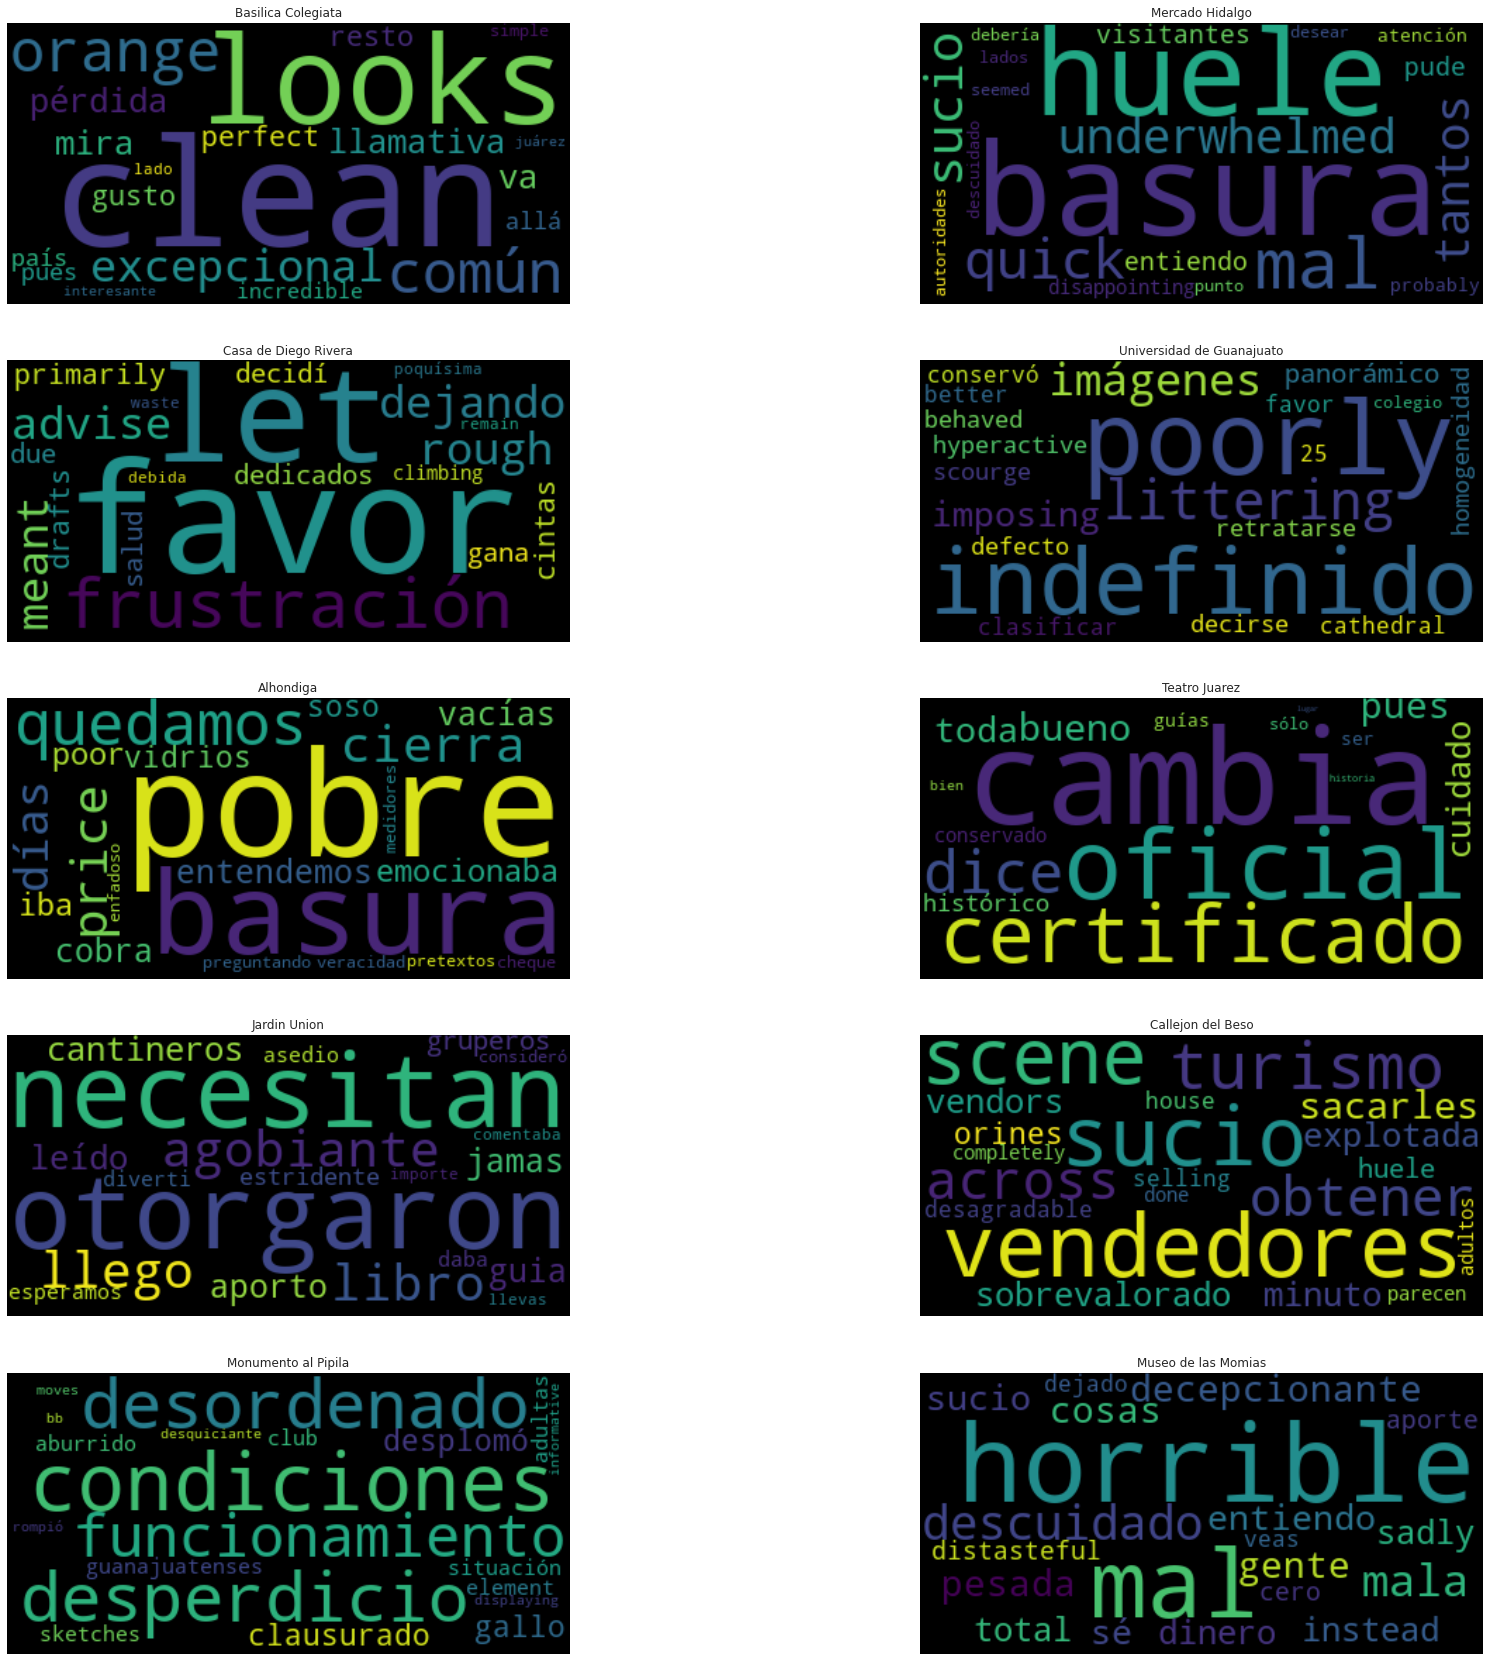

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# get stopwrds
sw = stopwords.words('spanish') + stopwords.words('english')

# get axis for figures
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]

for docs, labels, name, ax in zip(docs_by_place, labels_by_place, ds_names, axs):
    #vocabulary = get_vocabulary(docs)
    features, scores = get_features_by_hand(docs, labels, 2, 20, sw=sw)
    
    frequencies = {}
    for (word, weight) in zip(features.keys(), scores):
        frequencies[word] = weight
        
    # Generate a word cloud image
    wordcloud = WordCloud().generate_from_frequencies(frequencies)
    # plot 
    ax.imshow(wordcloud, interpolation='bilinear', )
    ax.axis("off")
    ax.set_title(name)
    

# 5. Bag of Words

In [14]:
def get_bows(documents, T, sw=None):
    # bow builders
    bow_b = bow_builder(max_features=T, stop_words=sw)
    bow_bigram_b = bow_builder(max_features=T, ngram_range=(2, 2), stop_words=sw)
    bow_trigram_b = bow_builder(max_features=T, ngram_range=(3, 3), stop_words=sw)
    
    # tfidf transform
    tfidf = TfidfTransformer()
    
    # get bows
    bow = bow_b.fit_transform(documents)
    bow = tfidf.fit_transform(bow)
    
    bow_bi = bow_bigram_b.fit_transform(documents)
    bow_bi = tfidf.fit_transform(bow_bi)
    
    bow_tri = bow_trigram_b.fit_transform(documents)
    bow_tri = tfidf.fit_transform(bow_tri)
    
    # get vocabulary
    voc = bow_b.get_feature_names_out()
    voc_bi = bow_bigram_b.get_feature_names_out()
    voc_tri = bow_trigram_b.get_feature_names_out()
        
    return bow, bow_bi, bow_tri, voc, voc_bi, voc_tri

In [106]:
def tfidf_maxscore(bow, y):
    return np.max(bow.toarray(), axis=0)

def tfidf_avgscore(bow, y):
    return np.sum(bow.toarray(), axis=0)

In [107]:
def get_best_features(bow, voc, k):
    discriminator = SelectKBest(score_func=tfidf_maxscore, k=k)
    new_bow = discriminator.fit_transform(bow, np.zeros(bow.shape[0]))
    features = discriminator.get_feature_names_out(voc)
    return new_bow, features

In [123]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from scipy.sparse import hstack 

# get stopwrds
sw = stopwords.words('spanish') + stopwords.words('english')

# get axis for figures
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30, 30))
# linearize axis
axs = [a for ax in axs for a in ax]


best_combined_feats_by_place = []

for docs, labels, name, ax in zip(docs_by_place, labels_by_place, ds_names, axs):
    # get bows
    bow, bow_bi, bow_tri, voc, voc_bi, voc_tri = get_bows(docs, T=10000)
    bow, voc = get_best_features(bow, voc, 1000)
    bow_bi, voc_bi = get_best_features(bow_bi, voc_bi, 2000)
    bow_tri, voc_tri = get_best_features(bow_tri, voc_tri, 1000)
    
    # append bows
    final_bow = hstack([bow, bow_bi, bow_tri])
    final_features = list(voc) + list(voc_bi)  + list(voc_tri)
    
    # get best 1000 of all features 
    discriminator = SelectKBest(chi2, k=1000)
    reduced_bow = discriminator.fit_transform(final_bow, labels)
    reduced_features = discriminator.get_feature_names_out(final_features)
    
    # get scores
    support = discriminator.get_support(indices=True)
    reduced_scores = discriminator.scores_[support]
    
    # append features to list
    best_combined_feats_by_place.append(reduced_features)
    
    # get indexes of best 50 features 
    indexes = np.argsort(reduced_scores)[-50:]
    frequencies = {}
    for (word, weight) in zip(reduced_features[indexes], reduced_scores[indexes]):
        frequencies[word] = weight
        
    # Generate a word cloud image
    wordcloud = WordCloud().generate_from_frequencies(frequencies)
    # plot 
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(name)

# 6. Análisis Temporal con Palabras más relevantes

In [163]:
def get_opinion_sorted(ds):
    return list(ds.sort_values(['Fecha'], ascending=True)['Opinión'])

In [194]:
all_docs = [doc for place in docs_by_place for doc in place]
all_labels = [label for place in labels_by_place for label in place]

_, scores, features = get_features(all_docs, all_labels, 10, T=10000, transform=True, sw=sw)

In [195]:
list(features)

['desagradable',
 'descuidado',
 'esperaba',
 'horrible',
 'huele',
 'mal',
 'momias',
 'morbo',
 'peor',
 'sucio']

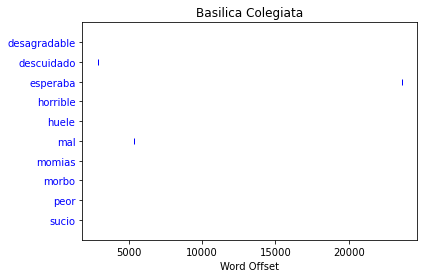

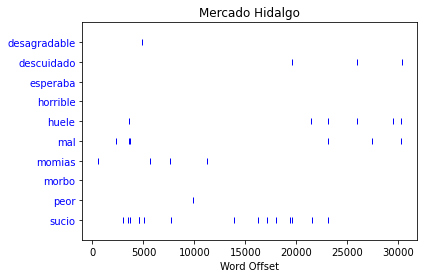

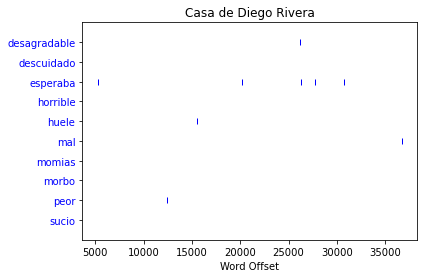

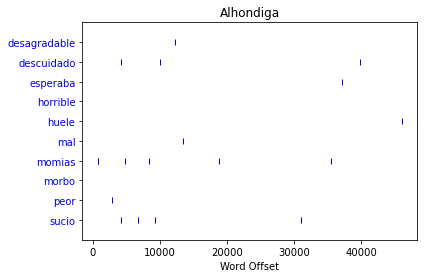

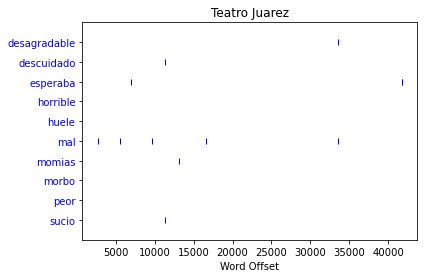

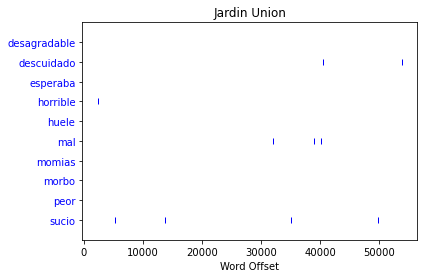

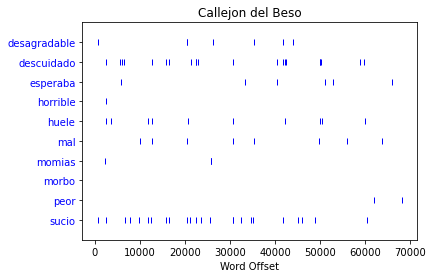

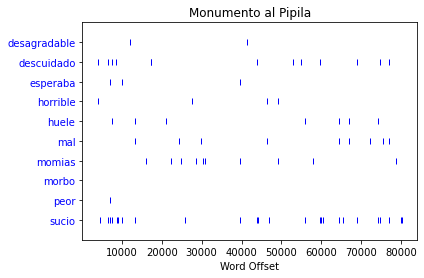

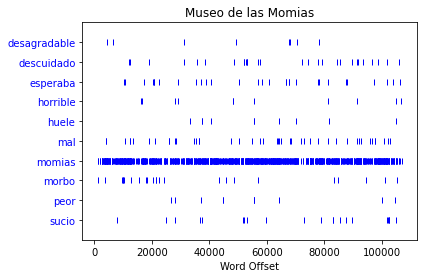

In [196]:
from nltk.draw.dispersion import dispersion_plot
for ds, ds_name in zip(datasets, ds_names):
    opiniones = get_opinion_sorted(ds)
    opiniones = process_documents(opiniones, tokenize=True)
    opiniones = [token for opinion in opiniones for token in opinion]
    opiniones = nltk.Text(opiniones)
    #opiniones.dispersion_plot(list(features), title=ds_name)
    dispersion_plot(opiniones, list(features), ignore_case=True, title=ds_name)

# 7. Gráfica Temporal de Formato Libre

In [5]:
import calendar
calendar.month_name[int('03')]

'March'

In [6]:
import calendar
import pandas as pd
def build_time_df(ds, n_groups=8):
    ds = ds.sort_values(['Fecha'], ascending=True)
    scores = list(ds['Escala'])
    fechas = list(ds['Fecha'])
    
    dates_dict = {}
    
    # build dictionary with dates (YY/mm) as keys and list[count positive, count neutral, count negative] as values.
    for score, fecha in zip(scores, fechas):
        score, fecha = int(score), str(fecha)
        year, month, _ = fecha.split('-')
        month = calendar.month_name[int(month)][:3]
        if dates_dict.get(year + ' ' + month) is None:
            dates_dict[year + ' ' + month] = [0, 0, 0]
        
        label_pos = 1 if score==3 else 0 if score>=4 else 2
        dates_dict[year + ' ' + month][label_pos]+= 1
    
    # dictionary to build dataframe
    data = {'positive':[], 'neutral':[], 'negative':[]}
    index = []
    
    date_values = list(dates_dict.items())
    remainder = len(date_values)%n_groups
    
    # group data
    z = zip(*[iter(date_values)]*n_groups)
    
    for group in z:
        # group[0] contains keys, i.e. the date in yy/mm (not the day)
        # get range in time as a string
        date_name = group[0][0] + '-' + group[-1][0] 
        index.append(date_name)
        sum_0, sum_1, sum_2 = 0, 0, 0
        for (_, value) in group:
            # count positive, neutral and negative opinions
            sum_0 += value[0]
            sum_1 += value[1]
            sum_2 += value[2]
            
        data['positive'].append(sum_0)
        data['neutral'].append(sum_1)
        data['negative'].append(sum_2)
    
    # last group (the one that has not enough observations so was discarded by the zip)
    if remainder>0:
        remainder_data = date_values[-remainder: ]
        
        date_name = remainder_data[0][0] + '-' + remainder_data[-1][0] 
        index.append(date_name)
        sum_0, sum_1, sum_2 = 0, 0, 0
        for (_, value) in remainder_data:
            sum_0 += value[0]
            sum_1 += value[1]
            sum_2 += value[2]
            
        data['positive'].append(sum_0)
        data['neutral'].append(sum_1)
        data['negative'].append(sum_2)
    
    # build dataframe
    df = pd.DataFrame(data,index=index)
    return df

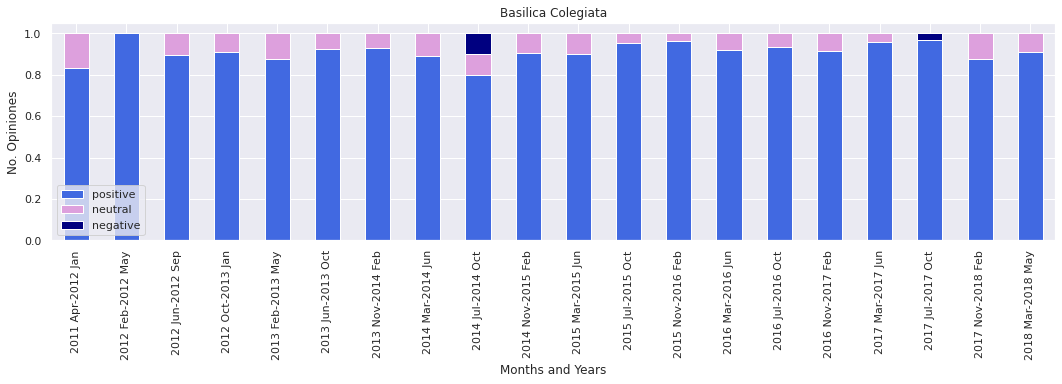

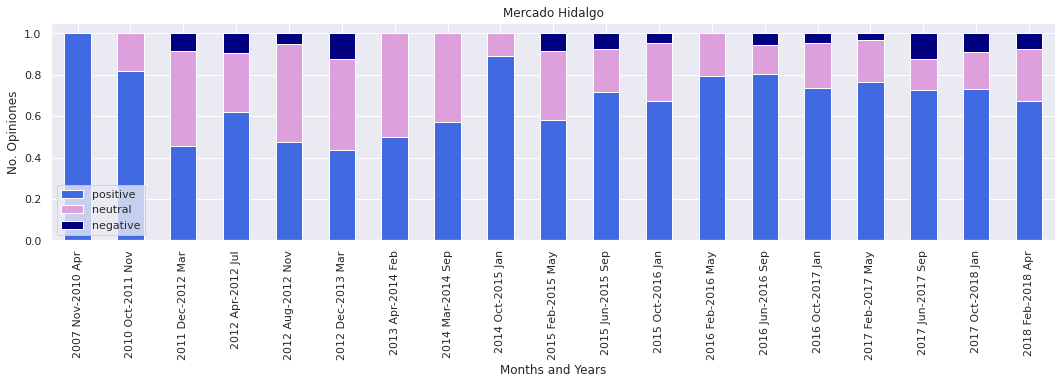

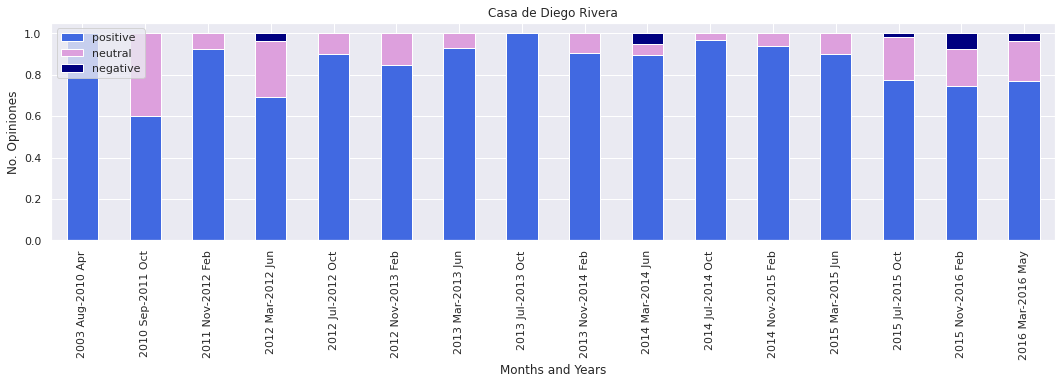

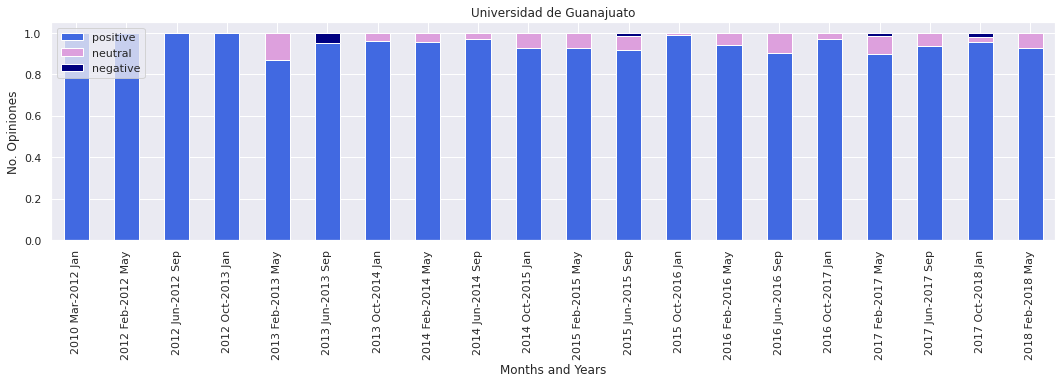

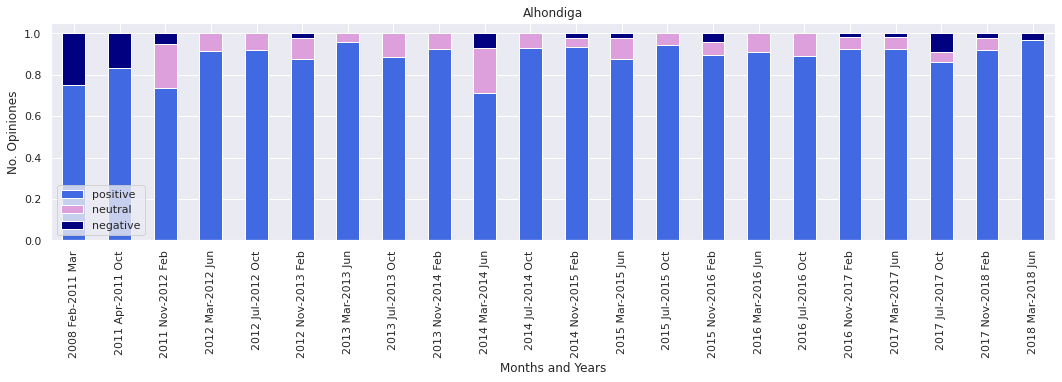

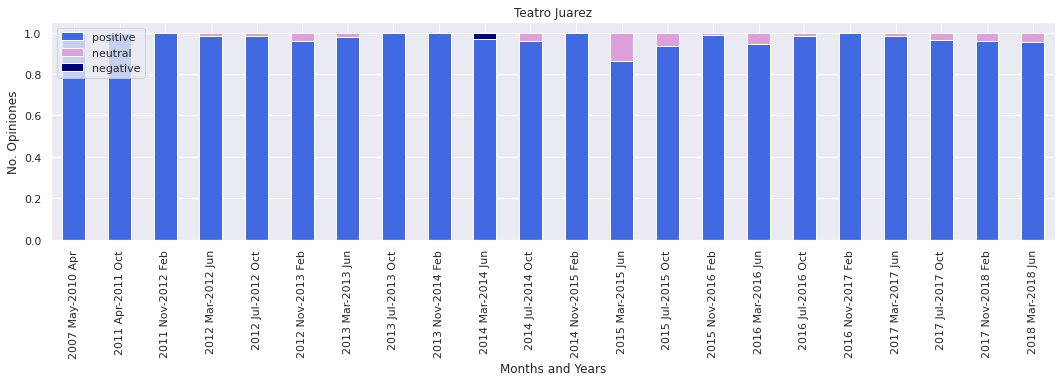

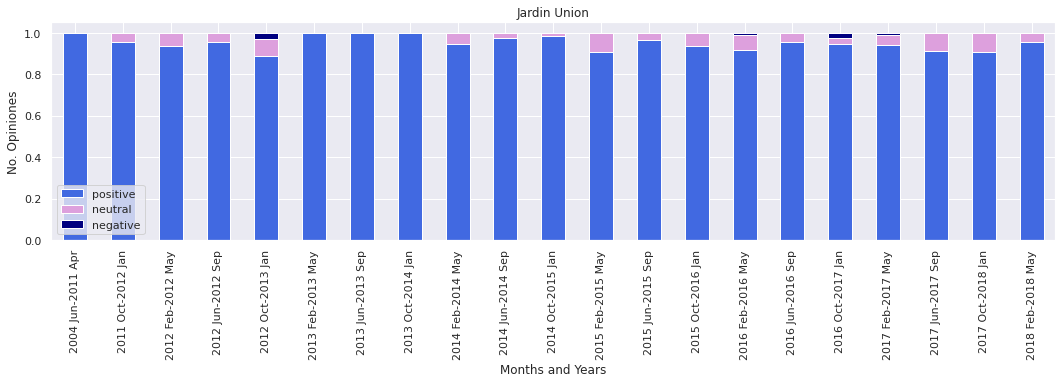

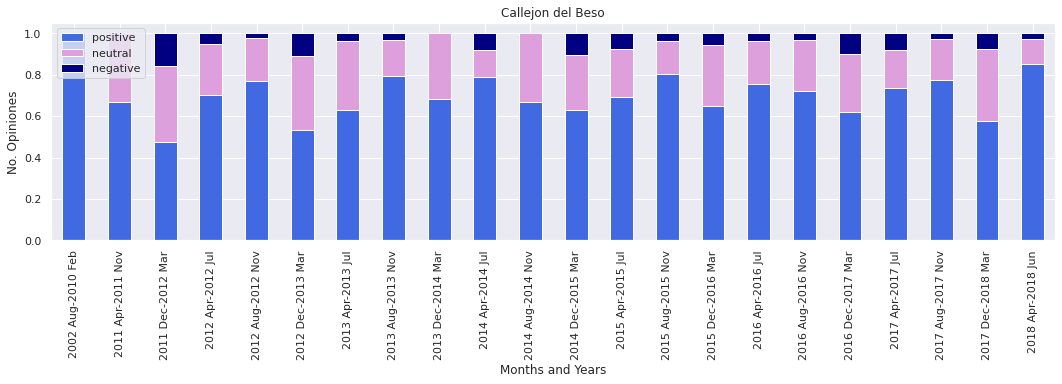

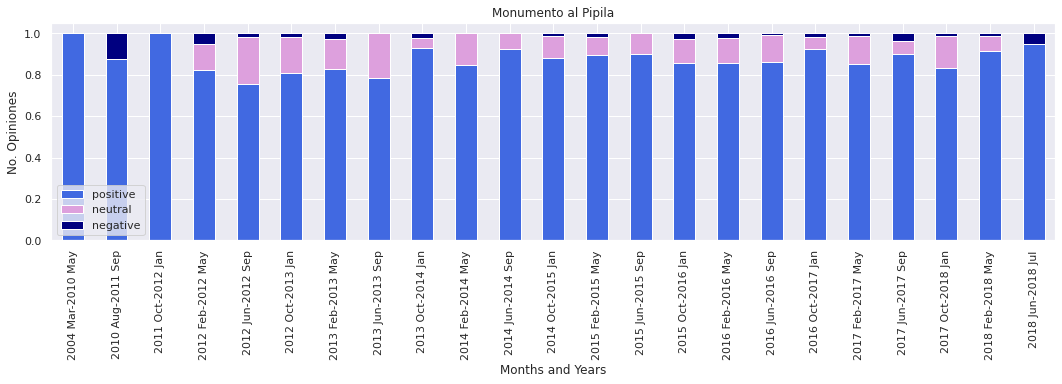

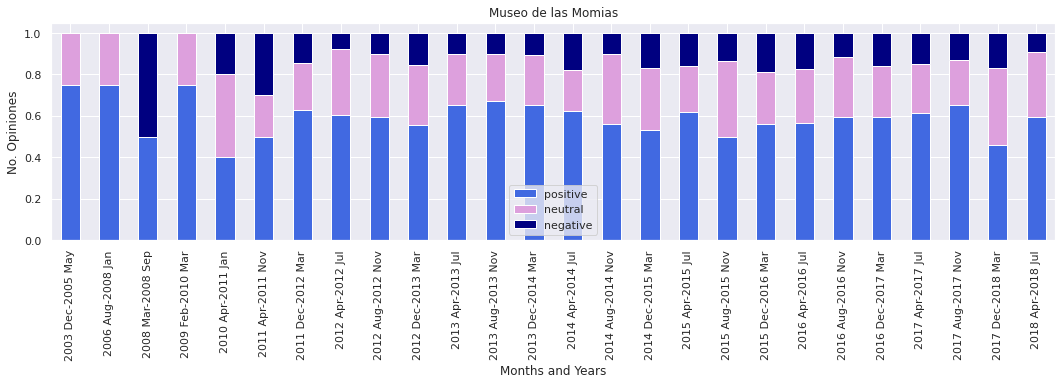

In [7]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set sns theme to matplotlib
sns.set()
for ds, ds_name in zip(datasets, ds_names):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
    # create DataFrame
    df = build_time_df(ds, 4)
    df = df.div(df.sum(axis=1), axis=0) 

    # create stacked bar chart for monthly temperatures
    df.plot(kind='bar', stacked=True, color=['royalblue', 'plum', 'navy'], ax=ax)

    # labels for x & y axis
    plt.xlabel('Months and Years')
    plt.ylabel('No. Opiniones')

    # title of plot
    plt.title(ds_name)

# Preguntas

## 1. ¿De los sitios turísticos, cual diría usted que es el más polémico y la razón de ello?

##### Diría que uno de los lugares más polémicos sin duda alguna es el museo de momias. Este lugar es un lugar muy característico de Guanajuato, pues aunque los otros lugares son muy bonitos debido a su arquitectura y tienen mucha historia, el museo de momias es algo que se podría considerar "único" y es de hecho un lugar muy mencionado de los lugares icónicos de Guanajuato. Sin embargo la puntuación promedio de este lugar es la peor y la longitud promedio de los comentarios es la más larga, lo que nos lleva a pensar que de hecho hay muchas quejas respecto a este lugar. Al analizar las nubes de palabras podemos ver que las opiniones de que es un lugar decepcionante, descuidado y sucio aparecen repetidas veces. En el análisis temporal podemos observar primero que la mayoría de palabras, obtenidas a través de la métrica chi cuadrado, son negativas y en el dispersion plot que más aparecen y con una mayor constancia son en opiniones del museo de momias. También podemos observar a través del análisis temporal con la cantidad de opiniones negativas que este lugar es el que cuenta con una mayor proporción de opiniones negativas y nuevamente de manera constante a través del tiempo. 

## 2. En cuanto al sitio más polémico, ¿Como es la diferencia de opinión y temas entre turistas nacionales e internacionales?

## 3. ¿Cual diría que es el sitio que le gusta más a las mujeres y por qué?

## 4. ¿Cual diría que es el sitio que le gusta más a las personas jóvenes y por qué?

## 5. ¿Qué otras observaciones valiosas puede obtener de su análisis? (e.g., ¿identificó de que se queja la gente? ¿qué tipo de cosas le gustó a la gente?, etc.)

# Pruebas

## pruebas bow de bigramas y trigramas y reduccion con tfidf

In [15]:
bow, bow_bi, bow_tri, voc, voc_bi, voc_tri = get_bows(docs_by_place[0], T=10000)

In [101]:
from scipy.sparse import hstack as col_stack
print(bow.shape[1] + bow_bi.shape[1])
col_stack([bow, bow_bi, bow_tri]).toarray().shape

13853


(560, 23853)

In [104]:
voc

array(['00', '04', '098', ..., 'únicas', 'único', 'únicos'], dtype=object)

In [45]:
bow.shape[0]

560

In [121]:
discriminator = SelectKBest(score_func=tfidf_score, k=1000)
new_bow = discriminator.fit_transform(bow_bi, np.zeros(bow_bi.shape[0]))
features = discriminator.get_feature_names_out(voc_bi)
indexes = discriminator.get_support(indices=True)

In [122]:
discriminator.scores_[indexes]

array([ 0.31970166,  0.66971227,  0.29833908,  0.35009608,  0.30491929,
        0.36810788,  0.33131124,  0.79783555,  0.44885158,  0.29664575,
        0.30372824,  0.30105994,  0.29521302,  0.4379606 ,  0.29130761,
        0.29130761,  0.53342642,  0.54009928,  0.29361546,  0.47117519,
        0.31640754,  0.39021563,  0.2893237 ,  0.50666694,  0.30704762,
        0.50251275,  0.30029246,  0.55320254,  0.29130761,  0.29361546,
        0.29737859,  0.37022783,  0.29764913,  0.30308912,  0.3076084 ,
        0.36822484,  0.29764913,  0.89726556,  0.44200166,  0.57570879,
        1.73762449,  0.57619106,  0.83972175,  0.72456779,  0.41106589,
        0.29185233,  0.36822484,  0.30229956,  0.48070553,  0.29833908,
        0.59923935,  0.32135304,  0.31310423,  0.49375323,  0.48552332,
        0.28878834,  0.3379937 ,  1.57087127,  0.67046504,  0.50722625,
        0.33732034,  0.32604782,  0.30491929,  0.4424449 ,  0.82544413,
        0.57426975,  0.32559634,  0.51961111,  0.35770568,  0.45

In [75]:
new_bow.transform(bow).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## prueba bows

In [ ]:
docs = [['hola', 'mundo'],['documento','hola','numero', '2', 'orale'],['que', 'hola','bonito', 'es', 'lo', 'bonito']]
labels = [1, 0, 0]
vocabulary = get_vocabulary(docs)
bow_b = bow_builder(max_features=10, vocabulary=None, binary=False, tokenizer=dummy, preprocessor=dummy, stop_words=['lo'])
bow = bow_b.fit_transform(docs)

tfidf = TfidfTransformer(use_idf=True, smooth_idf=False)


getFeat = SelectKBest(chi2, k=5)

X = getFeat.fit_transform(bow, labels)

getFeat.get_feature_names_out(bow_b.get_feature_names_out())

In [143]:
np.sum(LabelBinarizer().fit_transform([1, 1, 2, 2, 0, 1, 2, 5])[:,0][:,np.newaxis])

1

In [114]:
bow.toarray()

array([[0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
       [0, 2, 0, 1, 1, 1, 0, 0, 0, 1]])

In [113]:
tfidf.fit_transform(bow).toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.43016528,
        0.        , 0.90275015, 0.        , 0.        , 0.        ],
       [0.48638585, 0.        , 0.48638585, 0.        , 0.23176546,
        0.        , 0.        , 0.48638585, 0.48638585, 0.        ],
       [0.        , 0.74395942, 0.        , 0.37197971, 0.17725032,
        0.37197971, 0.        , 0.        , 0.        , 0.37197971]])

0.9999999966439369

In [55]:
chi2(bow, labels)

(array([2., 4., 2., 2., 2., 2., 2., 2., 2., 2.]),
 array([0.36787944, 0.13533528, 0.36787944, 0.36787944, 0.36787944,
        0.36787944, 0.36787944, 0.36787944, 0.36787944, 0.36787944]))

In [110]:
bow_b.get_feature_names_out()

array(['2', 'bonito', 'documento', 'es', 'hola', 'lo', 'mundo', 'numero',
       'orale', 'que'], dtype=object)

In [91]:
bow.toarray().shape

(3, 10)

In [70]:
getFeat.scores_

array([0.5, 1. , 0.5, 0.5, 2. , 0.5, 2. , 0.5, 0.5, 0.5])

In [71]:
X.toarray()

array([[0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [2, 0, 0, 0, 1]])

In [22]:
bow.toarray()

array([[0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [0, 2, 0, 1, 0]])

In [204]:
#tf_matrix = np.random.choice([0, 1, 2, 3, 5], (10, 10))
labels = [1, 0, 2, 0, 2, 2, 0, 0, 3, 1]

Nt = len(tf_matrix)
bin_labels = LabelBinarizer().fit_transform(labels)
bin_labels = [bin_labels[:, i][:,np.newaxis] for i in range(bin_labels.shape[1])] 

n_i = np.sum(tf_matrix>0, axis=0)
n_ic = np.array([np.sum((tf_matrix * bin_label)>0, axis=0) for bin_label in bin_labels])
n_c = np.array([np.sum(bin_label) for bin_label in bin_labels])[:, np.newaxis]

labels = np.array(labels)[:, np.newaxis]

n_i1 = np.sum((tf_matrix * labels)>0, axis=0)
n_i0 = np.sum((tf_matrix * (1-labels))>0, axis=0)

n_1 = np.sum(labels, axis=0)
n_0 = Nt - n_1
                 
# compute chi
chi_1 = Nt*(Nt * n_i1 - n_1 * n_i)/(n_1 * n_i * (Nt - n_1) * (Nt - n_i))
chi_0 = Nt*(Nt * n_i0 - n_0 * n_i)/(n_0 * n_i * (Nt - n_0) * (Nt - n_i))

chi_c = Nt*(Nt * n_ic - n_c * n_i)**2/(n_c * n_i * ((Nt - n_c) * (Nt - n_i)))

                 

/tmp/ipykernel_32964/438763848.py:21: RuntimeWarning: divide by zero encountered in true_divide
  chi_1 = Nt*(Nt * n_i1 - n_1 * n_i)/(n_1 * n_i * (Nt - n_1) * (Nt - n_i))
/tmp/ipykernel_32964/438763848.py:22: RuntimeWarning: divide by zero encountered in true_divide
  chi_0 = Nt*(Nt * n_i0 - n_0 * n_i)/(n_0 * n_i * (Nt - n_0) * (Nt - n_i))
/tmp/ipykernel_32964/438763848.py:24: RuntimeWarning: invalid value encountered in true_divide
  chi_c = Nt*(Nt * n_ic - n_c * n_i)**2/(n_c * n_i * ((Nt - n_c) * (Nt - n_i)))


In [174]:
tf_matrix

array([[2, 3, 3, 1, 2, 1, 3, 1, 0, 0],
       [1, 1, 0, 2, 2, 0, 0, 1, 1, 1],
       [0, 0, 0, 3, 3, 3, 0, 3, 1, 0],
       [0, 1, 1, 1, 3, 1, 1, 3, 1, 0],
       [2, 1, 1, 1, 0, 2, 2, 3, 2, 2],
       [2, 2, 1, 3, 3, 2, 3, 2, 3, 3],
       [3, 3, 0, 3, 1, 0, 2, 3, 1, 3],
       [2, 3, 0, 1, 2, 3, 0, 0, 1, 3],
       [2, 0, 0, 1, 3, 3, 3, 3, 2, 0],
       [2, 2, 1, 0, 0, 0, 0, 2, 0, 2]])

In [203]:
chi_c

array([[0.74074074, 0.10416667, 0.07936508, 1.66666667, 0.625     ,
        1.26984127, 0.10416667,        nan,        nan, 0.10416667],
       [4.44444444, 0.625     , 1.07142857, 0.27777778, 0.10416667,
        1.07142857, 0.625     ,        nan,        nan, 1.40625   ],
       [0.47619048, 0.47619048, 2.74376417, 0.47619048, 0.07936508,
        0.02267574, 0.47619048,        nan,        nan, 1.07142857],
       [0.12345679, 0.27777778, 0.47619048, 0.12345679, 1.66666667,
        0.47619048, 0.27777778,        nan,        nan, 0.27777778]])

In [205]:
chi_c

array([[0.74074074, 0.10416667, 0.07936508, 1.66666667, 0.625     ,
        1.26984127, 0.10416667,        nan,        nan, 0.10416667],
       [4.44444444, 0.625     , 1.07142857, 0.27777778, 0.10416667,
        1.07142857, 0.625     ,        nan,        nan, 1.40625   ],
       [0.47619048, 0.47619048, 2.74376417, 0.47619048, 0.07936508,
        0.02267574, 0.47619048,        nan,        nan, 1.07142857],
       [0.12345679, 0.27777778, 0.47619048, 0.12345679, 1.66666667,
        0.47619048, 0.27777778,        nan,        nan, 0.27777778]])

In [196]:
chi_0

array([-0.13888889, -0.15625   ,  0.11904762, -0.20833333, -0.15625   ,
        0.234375  , -0.15625   ,  0.11904762, -0.13888889, -0.13888889])

In [197]:
chi_1

array([ 0.13888889,  0.15625   , -0.11904762,  0.20833333,  0.15625   ,
       -0.234375  ,  0.15625   , -0.11904762,  0.13888889,  0.13888889])

In [181]:
np.array([1, 4, 5]) * np.array([[1],[2], [3]])

array([[ 1,  4,  5],
       [ 2,  8, 10],
       [ 3, 12, 15]])